# ***Исследование базы вакансий HeadHunter.***

**Название проекта:**

Исследование базы вакансий HeadHunter.
_____
**Цель исследования:**

Выявить различия в предлагаемых вакансиях для Аналитиков данных и Бизнес-аналитиков.
_____
**Задачи исследования:**

1. Определить наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils, опыт работы (для грейдов Junior, Junior+, Middle, Senior).

2. Определить типичное места работы для Аналитика данных и Бизнес-аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы (для грейдов Junior, Junior+, Middle, Senior).
_____
**Исходные данные:**
    
В качестве материала для анализа были получены два файла Excel из PI HH.ru.
______

**Работа над данным проектом была разделена на 4 шага:**

1) Изучение общей информации

2) Предобработка данных
- 2.1 Типы данных

- 2.2 Количественные значения
  - 2.2.1 Аналитик данных
  - 2.2.2 Бизнес-аналитик

- 2.3 Качественные значения
  - 2.3.1 Аналитик данных
  - 2.3.2 Бизнес-аналитик


3) Исследовательский анализ данных
- 3.1 "Идеальный кандидат" Аналитик данных
- 3.2 "Идеальный кандидат" Бизнес-аналитик
- 3.3 "Типичное место работы" Аналитика данных
- 3.3 "Типичное место работы" Бизнес-аналитика

4) Вывод про проекту
_________________


</div>

-------
#**1) Изучение общей информации**
<a id="start"></a>

In [347]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import warnings
warnings.filterwarnings('ignore')


In [348]:
spreadsheet_id_ba = '1l10P_3xTovJSgrlM06JljlC6xgPRYxrhPDfRimM6u8E'
file_name_ba = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_ba)
r = requests.get(file_name_ba)
business_analyst = pd.read_csv(BytesIO(r.content))

In [349]:
spreadsheet_id_da = '1cLrcSEFsatoevMTh4G7VOWYAlwPKLt2pCQoCTSE04I0'
file_name_da = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_da)
r = requests.get(file_name_da)
data_analyst = pd.read_csv(BytesIO(r.content))

In [350]:
data_analyst.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",Полный день,Полная занятость,на масштабный проект по созданию единого корпо...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,NaN,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",Полный день,Полная занятость,системный аналитик (инф. взаимодействие между ...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),"['Data Catalog', 'Data Governance', 'DMBOK DAM...",Полный день,Полная занятость,мтс – это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",NaN,NaN
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,NaN,Владимир,Junior+ (1-3 years),"['Spark', 'Data Analysis', 'Теория вероятносте...",Полный день,Полная занятость,наши преимущества: аккредитованная ит-компан...,наш преимущество аккредитовать ита компания си...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",NaN,NaN
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,NaN,Москва,Junior+ (1-3 years),"['MS Access', 'Управление проектами', 'Olap (o...",Полный день,Полная занятость,"evyap rus – международная fmcg компания, произ...",evyap rus международный fmcg компания производ...,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",NaN,Документация


In [351]:
business_analyst.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [352]:
data_analyst.info()
business_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                417 non-null    int64  
 1   name                              417 non-null    object 
 2   published_at                      417 non-null    object 
 3   alternate_url                     417 non-null    object 
 4   type                              417 non-null    object 
 5   employer                          417 non-null    object 
 6   department                        137 non-null    object 
 7   area                              417 non-null    object 
 8   experience                        417 non-null    object 
 9   key_skills                        417 non-null    object 
 10  schedule                          417 non-null    object 
 11  employment                        417 non-null    object 
 12  descript

In [353]:
print (data_analyst.columns)
business_analyst.columns

Index(['id', 'name', 'published_at', 'alternate_url', 'type', 'employer',
       'department', 'area', 'experience', 'key_skills', 'schedule',
       'employment', 'description', 'description_lemmatized', 'salary_from',
       'salary_to', 'salary_bin', 'key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description'],
      dtype='object')


Index(['id', 'name', 'published_at', 'alternate_url', 'type', 'employer',
       'department', 'area', 'experience', 'key_skills', 'schedule',
       'employment', 'description', 'description_lemmatized', 'salary_from',
       'salary_to', 'salary_bin', 'key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description'],
      dtype='object')

In [354]:
print (data_analyst.isna().sum()/len(data_analyst)*100)
business_analyst.isna().sum()/len(business_analyst)*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          67.146283
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         86.330935
salary_to                           92.805755
salary_bin                           0.000000
key_skills_from_key_skills_field    43.165468
hard_skills_from_description        78.177458
soft_skills_from_description        67.625899
dtype: float64


id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          79.228487
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         82.987141
salary_to                           86.943620
salary_bin                           0.000000
key_skills_from_key_skills_field    44.015826
hard_skills_from_description        83.481701
soft_skills_from_description        38.872404
dtype: float64

In [355]:
print (data_analyst.duplicated().sum())
business_analyst.duplicated().sum()

0


0

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** \
\
На данном этапе были открыты файлы с данными и сохранены в переменные 'data_analyst' и 'business_analyst'. Далее была изучена общая информация по ним для возможности приступить к дальнейшим шагам работы.
    
В датасетах 'data_analyst' и 'business_analyst' находяться 20 столбцов, содержащих следующие данные:
- id                                    
- name                                  
- published_at                         
- alternate_url                         
- type                                  
- employer                              
- department                          
- area                                  
- experience                            
- key_skills                            
- schedule                              
- employment                            
- description                            
- description_lemmatized                
- salary_from                         
- salary_to                           
- salary_bin                            
- key_skills_from_key_skills_field    
- hard_skills_from_description        
- soft_skills_from_description        
    




Было обнаружено что, столбцы 'published_at' - имеют некорректные типы данных, что может отразиться на будущих результатах, следовательно на следущем этапе будут обработаны данный столбцы' для устранения такого рода ошибок.
    
При анализе заголовков столбцов не было выявлено никаких замечаний, которые должны подвергнуться дополнительному анализу. Также не было обнаружено явных дубликатов в данных, но столбцы с качественными значениями будут повторно обработаны на следующем этапе работы для более детального рассмотрения информации хранящейся в них и проверки ее корректности.

Однако, было обаружено, что в 6 столбцах (department, salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description) были обнаружены пропущенные значения: все столбцы с количественными значениями будут обработаны повторно для выявления возможности заполнения таких пропусков, а в случае невозможности - их замены или оставлении.




-------
#**2) Предобработка данных**
<a id="then"></a>

-------
##**Типы данных**
-------
<a id="then1"></a>

In [356]:
data_analyst ['published_at'] = pd.to_datetime (data_analyst ['published_at'])
business_analyst['published_at'] = pd.to_datetime (business_analyst ['published_at'])

In [357]:
print (data_analyst['published_at'].dtypes)
print (business_analyst['published_at'].dtypes)

datetime64[ns]
datetime64[ns]


-------
##**Количественные значения**
<a id="then2"></a>

-------
###Аналитик данных
<a id="then221"></a>
-------


In [358]:
data_analyst.describe()

,id,published_at,salary_from,salary_to
count,4.170000e+02,417,57.000000,30.000000
mean,9.429466e+07,2024-03-22 16:42:25.371702528,111544.473684,206959.000000
min,7.732068e+07,2024-03-12 21:40:27,28940.000000,36175.000000
25%,9.380763e+07,2024-03-18 16:22:17,70000.000000,100000.000000
50%,9.496466e+07,2024-03-22 13:32:49,90000.000000,200000.000000
75%,9.543851e+07,2024-03-26 16:55:15,137000.000000,300000.000000
max,9.584608e+07,2024-03-31 22:20:48,350000.000000,400000.000000
std,2.103719e+06,NaN,64616.088828,109378.968652


In [359]:
data_analyst.isna().sum()/len(data_analyst)*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          67.146283
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         86.330935
salary_to                           92.805755
salary_bin                           0.000000
key_skills_from_key_skills_field    43.165468
hard_skills_from_description        78.177458
soft_skills_from_description        67.625899
dtype: float64

--------

In [360]:
data_analyst['published_at'].describe()

count                              417
mean     2024-03-22 16:42:25.371702528
min                2024-03-12 21:40:27
25%                2024-03-18 16:22:17
50%                2024-03-22 13:32:49
75%                2024-03-26 16:55:15
max                2024-03-31 22:20:48
Name: published_at, dtype: object

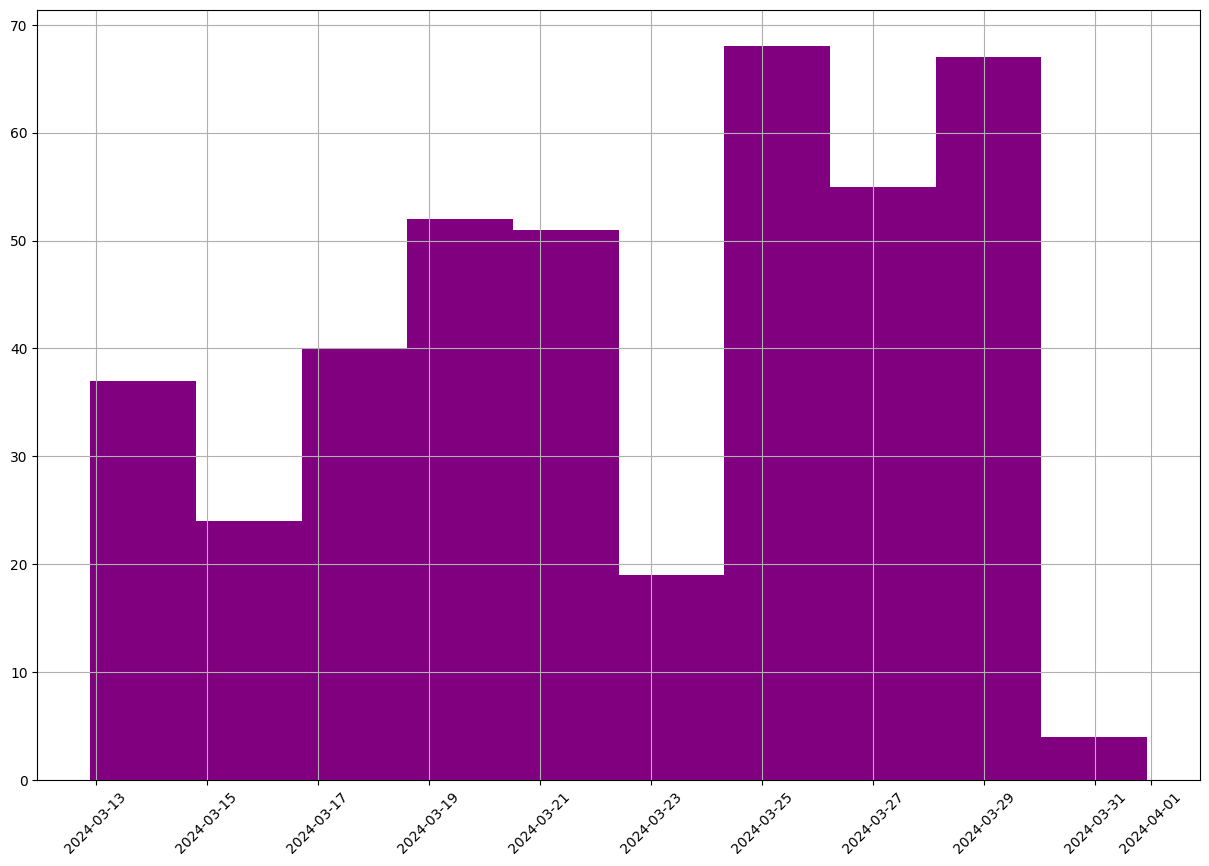

In [361]:
data_analyst['published_at'].hist(figsize = (15, 10), color = 'purple')
plt.xticks(rotation=45)
plt.show()

**Пояснение:**

Пропусков в столбце 'published_at', хранящем данные по дате публикации вакансии, не было обнаружено пропусков и аномальных значений.

Временным периодом для данных датасета data_analyst можно считать с 2024-03-12 по 2024-03-31.

In [362]:
data_analyst['salary_from'].describe()

count        57.000000
mean     111544.473684
std       64616.088828
min       28940.000000
25%       70000.000000
50%       90000.000000
75%      137000.000000
max      350000.000000
Name: salary_from, dtype: float64

<Axes: >

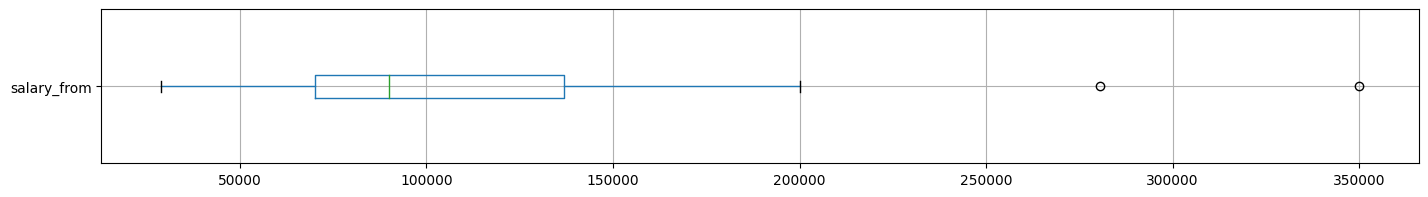

In [363]:
data_analyst.boxplot(column = 'salary_from', figsize = (17,2), vert = False)

<Axes: ylabel='Frequency'>

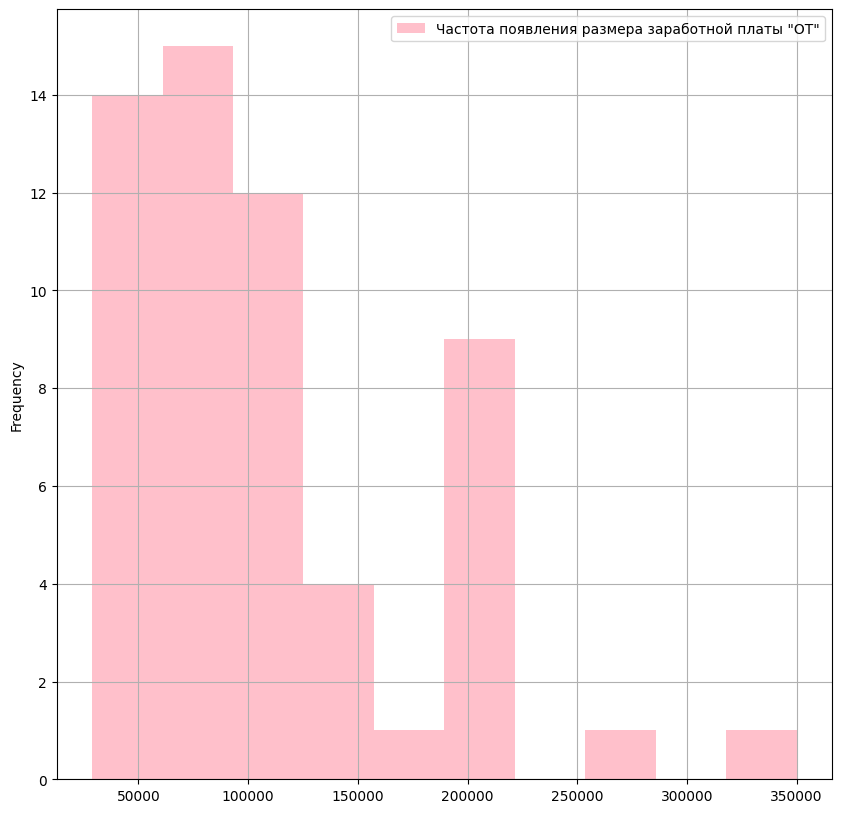

In [364]:
data_analyst['salary_from'].plot (kind = 'hist', figsize = (10, 10), grid = True, color = 'pink', \
                        label ='Частота появления размера заработной платы "ОТ"', legend = 'reverse')

**Пояснение:**

В столбце 'salary_from', хранящем данные о начальном уровне заработной платы по вакансии, были обнаружены пропуски, что повлияло на появление аномальных значений.

Учитывая, что в датасете data_analyst также присутствует столбец 'salary_bin' (хранит "зарплатную вилку" по каждой вакансии; более подходящий для задач данной работы; в котором отсутствуют пропущенные значения) было принято решение не заменять/заполнять пропущенные значения в столбце 'salary_from'.

In [365]:
data_analyst['salary_to'].describe()

count        30.000000
mean     206959.000000
std      109378.968652
min       36175.000000
25%      100000.000000
50%      200000.000000
75%      300000.000000
max      400000.000000
Name: salary_to, dtype: float64

<Axes: >

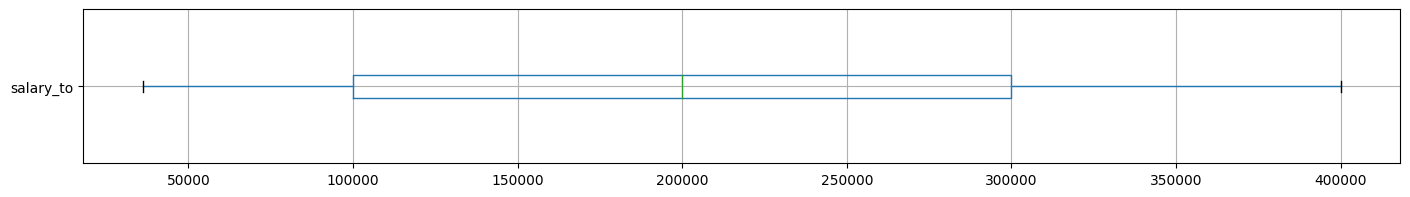

In [366]:
data_analyst.boxplot(column = 'salary_to', figsize = (17,2), vert = False)

<Axes: ylabel='Frequency'>

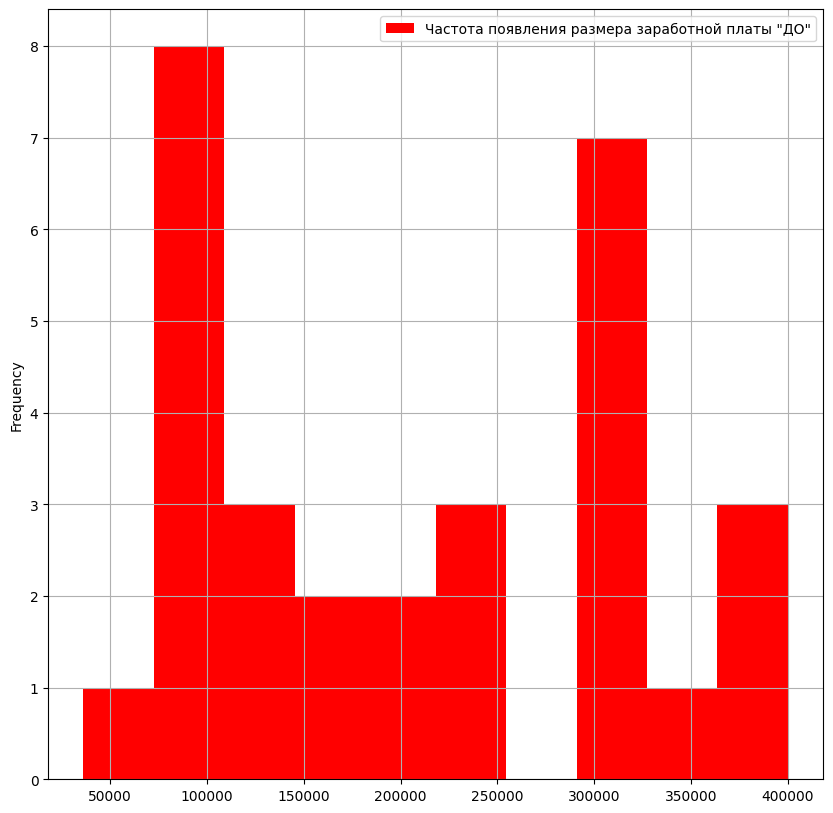

In [367]:
data_analyst['salary_to'].plot (kind = 'hist', figsize = (10, 10), grid = True, color = 'red', \
                        label ='Частота появления размера заработной платы "ДО"', legend = 'reverse')

**Пояснение:**

В столбце 'salary_to', хранящем данные о максимальном уровне заработной платы по вакансии, были обнаружены пропуски, что повлияло на появление аномальных значений.

Учитывая, что в датасете data_analyst также присутствует столбец 'salary_bin' (хранит "зарплатную вилку" по каждой вакансии; более подходящий для задач данной работы; в котором отсутствуют пропущенные значения) было принято решение не заменять/заполнять пропущенные значения в столбце 'salary_to'.

-------
###Бизнес-аналитик
<a id="then222"></a>
-------


In [368]:
business_analyst.describe()

,id,published_at,salary_from,salary_to
count,1.011000e+03,1011,172.000000,132.000000
mean,9.420746e+07,2024-03-22 16:19:55.533135616,119151.348837,163620.371212
min,7.753840e+07,2024-03-12 23:44:07,30000.000000,40000.000000
25%,9.379789e+07,2024-03-18 15:52:19,70000.000000,100000.000000
50%,9.497332e+07,2024-03-22 11:43:56,100000.000000,150000.000000
75%,9.541629e+07,2024-03-27 10:43:52.500000,150000.000000,200000.000000
max,9.584339e+07,2024-03-31 18:20:38,327250.000000,467500.000000
std,2.073457e+06,NaN,64347.693476,81081.961500


In [369]:
business_analyst.isna().sum()/len(business_analyst)*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          79.228487
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         82.987141
salary_to                           86.943620
salary_bin                           0.000000
key_skills_from_key_skills_field    44.015826
hard_skills_from_description        83.481701
soft_skills_from_description        38.872404
dtype: float64

-------

In [370]:
business_analyst['published_at'].describe()

count                             1011
mean     2024-03-22 16:19:55.533135616
min                2024-03-12 23:44:07
25%                2024-03-18 15:52:19
50%                2024-03-22 11:43:56
75%         2024-03-27 10:43:52.500000
max                2024-03-31 18:20:38
Name: published_at, dtype: object

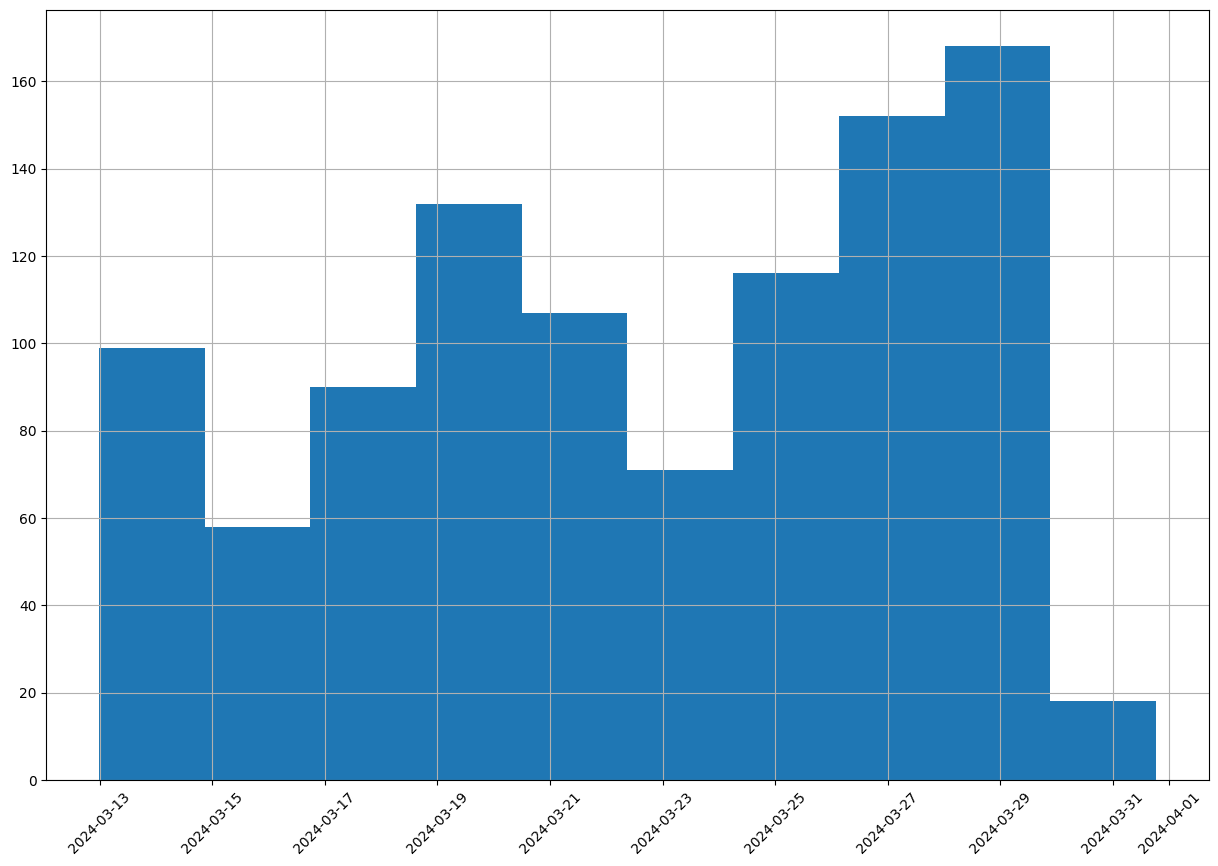

In [371]:
business_analyst['published_at'].hist(figsize = (15, 10))
plt.xticks(rotation=45)
plt.show()

**Пояснение:**

Пропусков в столбце 'published_at', хранящем данные по дате публикации вакансии, не было обнаружено пропусков и аномальных значений.

Временным периодом для данных датасета business_analyst можно считать с 2024-03-12 по 2024-03-31.

In [372]:
business_analyst['salary_from'].describe()

count       172.000000
mean     119151.348837
std       64347.693476
min       30000.000000
25%       70000.000000
50%      100000.000000
75%      150000.000000
max      327250.000000
Name: salary_from, dtype: float64

<Axes: >

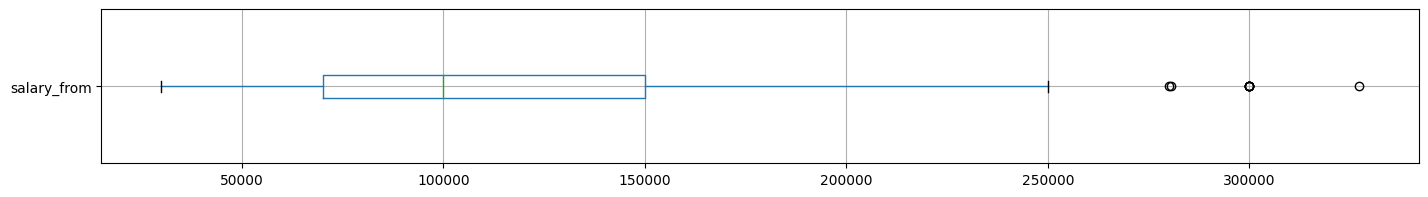

In [373]:
business_analyst.boxplot(column = 'salary_from', figsize = (17,2), vert = False)

<Axes: ylabel='Frequency'>

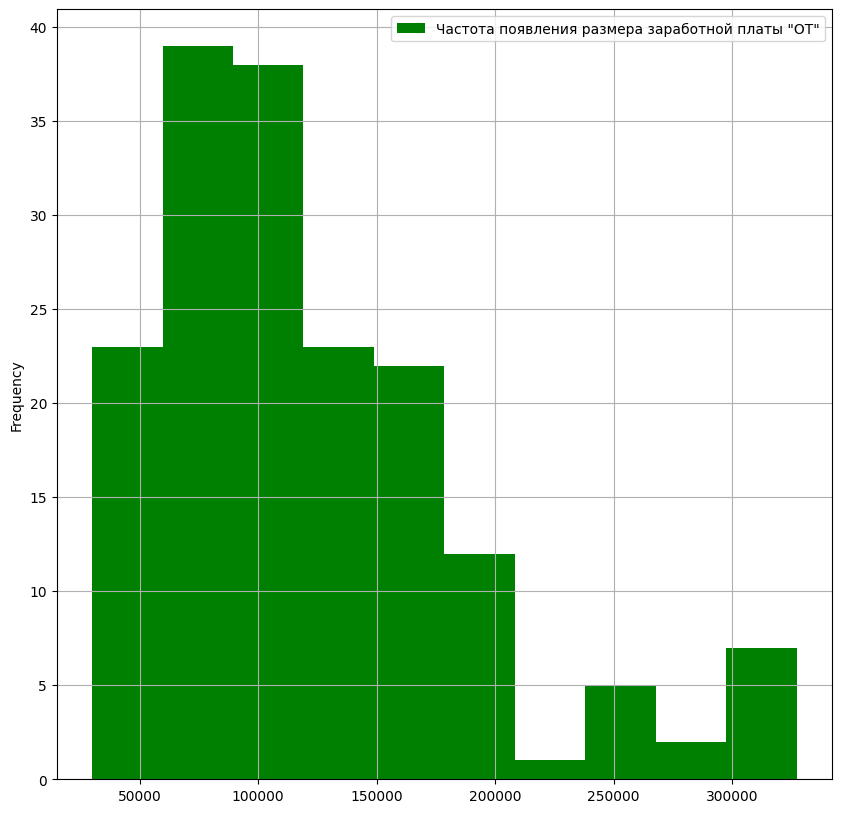

In [374]:
business_analyst['salary_from'].plot (kind = 'hist', figsize = (10, 10), grid = True, color = 'green', \
                        label ='Частота появления размера заработной платы "ОТ"', legend = 'reverse')

**Пояснение:**

В столбце 'salary_from', хранящем данные о начальном уровне заработной платы по вакансии, были обнаружены пропуски, что повлияло на появление аномальных значений.

Учитывая, что в датасете business_analyst также присутствует столбец 'salary_bin' (хранит "зарплатную вилку" по каждой вакансии; более подходящий для задач данной работы; в котором отсутствуют пропущенные значения) было принято решение не заменять/заполнять пропущенные значения в столбце 'salary_from'.

In [375]:
business_analyst['salary_to'].describe()

count       132.000000
mean     163620.371212
std       81081.961500
min       40000.000000
25%      100000.000000
50%      150000.000000
75%      200000.000000
max      467500.000000
Name: salary_to, dtype: float64

<Axes: >

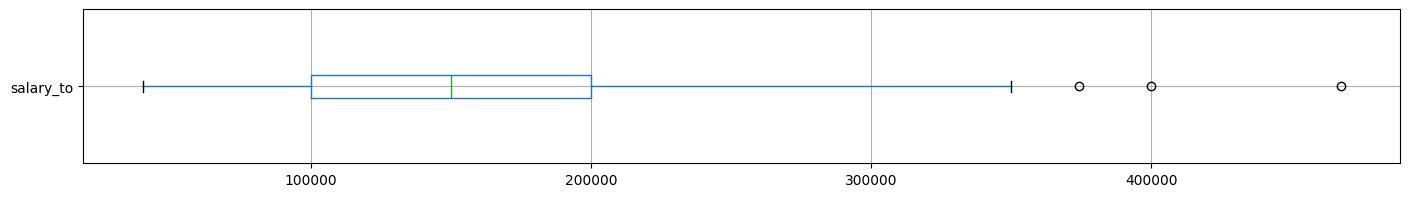

In [376]:
business_analyst.boxplot(column = 'salary_to', figsize = (17,2), vert = False)

<Axes: ylabel='Frequency'>

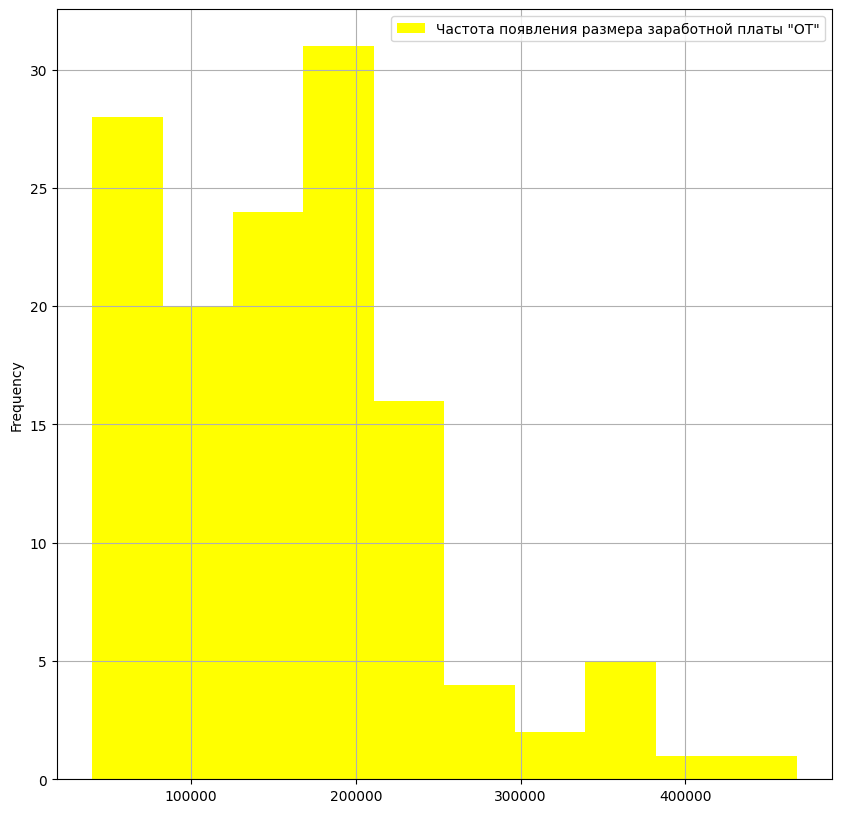

In [377]:
business_analyst['salary_to'].plot (kind = 'hist', figsize = (10, 10), grid = True, color = 'yellow', \
                        label ='Частота появления размера заработной платы "ОТ"', legend = 'reverse')

**Пояснение:**

В столбце 'salary_to', хранящем данные о начальном уровне заработной платы по вакансии, были обнаружены пропуски, что повлияло на появление аномальных значений.

Учитывая, что в датасете business_analyst также присутствует столбец 'salary_bin' (хранит "зарплатную вилку" по каждой вакансии; более подходящий для задач данной работы; в котором отсутствуют пропущенные значения) было принято решение не заменять/заполнять пропущенные значения в столбце 'salary_to'.

-------
##**Качественные значения**
<a id="then3"></a>

-------
###Аналитик данных
<a id="then231"></a>
-------


In [378]:
print(data_analyst.dtypes)
len(data_analyst)

id                                           int64
name                                        object
published_at                        datetime64[ns]
alternate_url                               object
type                                        object
employer                                    object
department                                  object
area                                        object
experience                                  object
key_skills                                  object
schedule                                    object
employment                                  object
description                                 object
description_lemmatized                      object
salary_from                                float64
salary_to                                  float64
salary_bin                                  object
key_skills_from_key_skills_field            object
hard_skills_from_description                object
soft_skills_from_description   

417

In [379]:
data_analyst.isna().sum()/len(business_analyst)*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          27.695351
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         35.608309
salary_to                           38.278932
salary_bin                           0.000000
key_skills_from_key_skills_field    17.804154
hard_skills_from_description        32.245302
soft_skills_from_description        27.893175
dtype: float64

-------

In [380]:
data_analyst[data_analyst.duplicated(['name', 'employer'])]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
40,92392717,Дата-аналитик в команду PRO,2024-03-29 18:50:35,https://hh.ru/vacancy/92392717,Открытая,2ГИС,NaN,Санкт-Петербург,Middle (3-6 years),"['GI', 'SQL', 'QGIS', 'ArcGIS', 'Документация'...",Удаленная работа,Полная занятость,мы создаем 2gis platform — гео-информационную ...,создавать 2gis platform гео информационный пла...,NaN,NaN,ЗП не указана,"ArcGIS, QGIS, Python, SQL, GI",NaN,Документация
42,92397930,"Data Analyst ""Growth""",2024-03-26 12:33:33,https://hh.ru/vacancy/92397930,Открытая,Okko,NaN,Москва,Junior+ (1-3 years),"['SQL', 'A/B тесты', 'confluence', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN
74,93285721,Data analyst/Аналитик данных,2024-03-16 13:48:01,https://hh.ru/vacancy/93285721,Открытая,Maxim technology,NaN,Тюмень,Middle (3-6 years),"['SQL', 'A/B тесты', 'Python', 'Pandas']",Полный день,Полная занятость,привет! мы - аккредитованная it компания maxim...,привет аккредитовать it компания maxim technol...,NaN,NaN,ЗП не указана,"SQL, Python, A/B тесты",Pandas,NaN
75,93285734,Data analyst/Аналитик данных,2024-03-16 13:48:08,https://hh.ru/vacancy/93285734,Открытая,Maxim technology,NaN,Екатеринбург,Middle (3-6 years),"['SQL', 'A/B тесты', 'Python', 'Pandas']",Полный день,Полная занятость,привет! мы - аккредитованная it компания maxim...,привет аккредитовать it компания maxim technol...,NaN,NaN,ЗП не указана,"SQL, Python, A/B тесты",Pandas,NaN
78,93342655,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342655,Открытая,INGURU.RU,NaN,Екатеринбург,Middle (3-6 years),"['Power BI', 'Аналитическое мышление', 'Аналит...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN
79,93342656,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342656,Открытая,INGURU.RU,NaN,Краснодар,Middle (3-6 years),"['Power BI', 'Аналитическое мышление', 'Аналит...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN
80,93342657,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342657,Открытая,INGURU.RU,NaN,Нижний Новгород,Middle (3-6 years),"['Power BI', 'Аналитическое мышление', 'Аналит...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN
81,93342658,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342658,Открытая,INGURU.RU,NaN,Казань,Middle (3-6 years),"['Power BI', 'Аналитическое мышление', 'Аналит...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN
88,93551149,Дата аналитик (Data Scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
89,93561517,Менеджер по развитию (аналитик данных),2024-03-29 11:05:30,https://hh.ru/vacancy/93561517,Открытая,Деловые Линии,NaN,Краснод

In [381]:
print (data_analyst['name'].nunique())
#data_analyst['name'].unique()

280


In [382]:
data_analyst = data_analyst[data_analyst['name'].str.contains('Аналитик данных|аналитик данных|Data analyst|data analyst|Дата аналитик|\
DATA аналитик|Дата-аналитик|DATA-аналитик|Big Data')]

In [383]:
print (data_analyst['name'].nunique())
#data_analyst['name'].unique()

147


***Пояснение:***

Столбец 'name', содержащий в себе наименования позиций/должностей, был обработан на предмет соответствия должности "Аналитик данных".

Были отсеяны наименования неподходящие позиции, такие как, например, "Бизнес аналитик", "Data Scientist" и др.

В данном столбце повторяющиеся значения - идентичные наименования позиций у разных компаний, следовательно обработки/замены/удаления не требуют.

In [384]:
print (data_analyst['type'].nunique())
data_analyst['type'].unique()

1


array(['Открытая'], dtype=object)

***Пояснение:***

Столбец 'type', содержащий в себе тип объявления, был обработан на дубликаты и уникальные значения.

Так, в столбце содержится лишь одно значение - 'Открытая', что свидетельствует о том, что все вакансии, предложенные в датасете data_analyst, открыты для откликов, следовательно обработки/замены/удаления данное значение не требует.

In [385]:
print (data_analyst['employer'].nunique())
data_analyst['employer'].unique()

150


array(['МТС', 'ЭлРос', 'EVYAP International Russia',
       'Группа компаний АГРОЭКО',
       'Кадровый Центр Департамента здравоохранения города Москвы',
       'Страховая компания Пульс', 'ПСБ (ПАО «Промсвязьбанк»)',
       'Evercode Lab', 'Ozon',
       'Министерство цифрового развития, связи и массовых коммуникаций Российской Федерации',
       'МАГНИТ, Розничная сеть', 'ПроКонтекст', 'ТехноГрупп',
       'Центр финансовых технологий', 'Самокат (ООО Умный ритейл)',
       'Займиго МФК', 'СБЕР', 'Joom', 'Банк Санкт-Петербург',
       'DPD в России', 'Московская Биржа', '2ГИС',
       'Российское общество Знание', 'Т1', 'Центр коммунального сервиса',
       'Армтек', 'DNS Технологии', 'R-Style Softlab (Эр-Стайл Софтлаб)',
       'Go Ahead', 'Ак Барс Банк', 'Квиллис', 'Деловые Линии',
       'Ямал, Авиационная транспортная компания', 'Концерн Телематика',
       'Maxim technology', 'INGURU.RU',
       'Лента, федеральная розничная сеть',
       'Федеральная налоговая служба (ФНС Росси

***Пояснение:***

Столбец 'employer', содержащий в себе наименования организаций-работодателей, был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные наименования разных компаний, следовательно обработки/замены/удаления не требуют.

In [386]:
print (data_analyst['department'].nunique())
data_analyst['department'].unique()

27


array(['«МТС», Digital', nan,
       'ПАО «Промсвязьбанк», Бизнес и инфраструктура',
       'Ozon Офис и Коммерция', 'Сбер для экспертов', 'Сбер. IT',
       'ГК Иннотех | Финтех (Иннотех)',
       'Ак Барс Банк, Специалистам и\xa0руководителям',
       'Лента, федеральная розничная сеть, IT ',
       'ПАО ВТБ, Технологический блок', 'Rambler&Co',
       'ПАО ВТБ, Подразделения Поддержки и Контроля', '«МТС» Медиа',
       'Гринатом. Центр Разработки.', 'Северсталь. IT & Digital',
       'Компания «СПОРТМАСТЕР», Розничные продажи', 'ДОМ.РФ ИТ',
       'ГК Иннотех | Большие данные', 'Яндекс', 'АВИТО ТЕХ: разработка',
       'ГК Иннотех | Интеграция Консалтинг',
       'Московский Кредитный Банк. Профессионалы', 'Газпромбанк',
       'Ozon Производство', 'Гринатом. Корпоративные IT-системы',
       'Ренессанс Банк, Москва', 'Компания «СПОРТМАСТЕР», Офис',
       ' Альфа-Банк'], dtype=object)

In [387]:
data_analyst ['department'] = data_analyst ['department'].str.strip()

In [388]:
data_analyst['department'] = data_analyst['department'].fillna('Не указано')

***Пояснение:***

Столбец 'department', содержащий в себе наименования департаментов организаций-работодателей, был обработан на дубликаты, уникальные и пропущенные значения.

Так, в данном столбце повторяющиеся значения - идентичные наименования разных департаментов компаний, следовательно обработки/замены/удаления не требуют. Стоит также отметить, что были обнаружены лишние пробелы в нименованиях, поэтому столбец был обработан для их удаления.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

In [389]:
print (data_analyst['area'].nunique())
data_analyst['area'].unique()

37


array(['Москва', 'Владимир', 'Воронеж', 'Санкт-Петербург', 'Краснодар',
       'Дзержинский', 'Новосибирск', 'Нижний Новгород', 'Белгород',
       'Челябинск', 'Владивосток', 'Казань', 'Тюмень', 'Екатеринбург',
       'Артем', 'Томск', 'Пермь', 'Щербинка', 'Кемерово', 'Адыгейск',
       'Королев', 'Вейделевка', 'Псков', 'Верхняя Пышма', 'Горно-Алтайск',
       'Ульяновск', 'Иваново (Ивановская область)', 'Луховицы',
       'Златоуст', 'Набережные Челны', 'Майкоп', 'Тверь', 'Байбек',
       'Ростов-на-Дону', 'Иркутск', 'Ижевск', 'Турочак'], dtype=object)

***Пояснение:***

Столбец 'area', содержащий в себе наименования городов организаций-работодателей, был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные наименования городов компаний, следовательно обработки/замены/удаления не требуют.

In [390]:
print (data_analyst['experience'].nunique())
data_analyst['experience'].unique()

4


array(['Junior+ (1-3 years)', 'Middle (3-6 years)',
       'Junior (no experince)', 'Senior (6+ years)'], dtype=object)

***Пояснение:***

Столбец 'experience', содержащий в себе наименования грейдов для вакансий "Аналитик данных", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные грейды, следовательно обработки/замены/удаления не требуют.

In [391]:
print (data_analyst['key_skills'].nunique())
#data_analyst['key_skills'].unique()

150


In [392]:
data_analyst[data_analyst['key_skills']=='[]'].head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
28,92070271,Младший аналитик данных (Junior Data Analyst),2024-03-18 22:41:00,https://hh.ru/vacancy/92070271,Открытая,СБЕР,Сбер для экспертов,Москва,Junior (no experince),[],Полный день,Полная занятость,в команду сети продаж ищем аналитика данных об...,команда сеть продажа искать аналитика данные о...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
35,92356628,Аналитик данных,2024-03-29 15:52:14,https://hh.ru/vacancy/92356628,Открытая,Московская Биржа,Не указано,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,в 2022 году московской бирже исполнилось 30 ле...,2 22 год московский биржа исполняться 3 год по...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
61,92967183,Аналитик данных,2024-03-18 11:09:14,https://hh.ru/vacancy/92967183,Открытая,R-Style Softlab (Эр-Стайл Софтлаб),Не указано,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,"r-style softlab — российская it-компания, сист...",r style softlab российский it компания системн...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
69,93205333,Аналитик данных,2024-03-13 13:52:29,https://hh.ru/vacancy/93205333,Открытая,"Ямал, Авиационная транспортная компания",Не указано,Тюмень,Middle (3-6 years),[],Полный день,Полная занятость,обязанности: сбор данных из различных источни...,обязанность сбор данные различный источник вкл...,70000.0,NaN,ЗП не указана,NaN,NaN,NaN
71,93276307,Data engineer/Data analyst,2024-03-15 13:38:46,https://hh.ru/vacancy/93276307,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,в sberdata мы создаем платформу данных для все...,sberdata создавать платформа данные весь сбер ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN


***Пояснение:***

Столбец 'key_skills', содержащий в себе перечни ключевых навыков из раздела "Ключевые навыки" для вакансий "Аналитик данных", был обработан на дубликаты и уникальные значения.

Так, большой объем данных, а также наличие пустых списков в столбце, не позволяет достоверно проверить данные. По этой причине, данный столбец на настоящий момент не будет использоваться для анализа, однако, при необходимости возможно вернуться к его обработке повторно.

In [393]:
print (data_analyst['schedule'].nunique())
data_analyst['schedule'].unique()

4


array(['Полный день', 'Гибкий график', 'Удаленная работа',
       'Сменный график'], dtype=object)

***Пояснение:***

Столбец 'schedule', содержащий в себе график работы для вакансий "Аналитик данных", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные графики, следовательно обработки/замены/удаления не требуют.

In [394]:
print (data_analyst['employment'].nunique())
data_analyst['employment'].unique()

4


array(['Полная занятость', 'Стажировка', 'Проектная работа',
       'Частичная занятость'], dtype=object)

***Пояснение:***

Столбец 'employment', содержащий в себе тип занятости для вакансий "Аналитик данных", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные типы занятости, следовательно обработки/замены/удаления не требуют.

In [395]:
print (data_analyst['description'].nunique())
#data_analyst['description'].unique()

231


In [396]:
print (data_analyst['description_lemmatized'].nunique())
#data_analyst['description_lemmatized'].unique()

231


***Пояснение:***

Столбцы 'description' и 'description_lemmatized', содержащие в себе описание вакансий "Аналитик данных", были обработаны на дубликаты и уникальные значения.

Так, большой объем данных, который содержится в каждой ячейке стоблцов, не позволяет достоверно проверить данные. По этой причине, и в совокупности с отражением излишний информации для данного проекта, данные столбцы на настощий момент не будут учавствовать в дальнейшем анализе.

In [397]:
print (data_analyst['salary_bin'].nunique())
data_analyst['salary_bin'].unique()

5


array(['ЗП не указана', 'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч',
       'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч'], dtype=object)

***Пояснение:***

Столбец 'salary_bin', содержащий в себе значения зарплатной вилки для вакансий "Аналитик данных", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - значения зарплатной вилки, следовательно обработки/замены/удаления не требуют.

In [398]:
print (data_analyst['key_skills_from_key_skills_field'].nunique())
#data_analyst['key_skills_from_key_skills_field'].unique()

137


In [399]:
data_analyst[data_analyst['key_skills_from_key_skills_field'].isna()]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
5,86212079,Аналитик данных BI отдела автоматизации (гибри...,2024-03-29 16:50:53,https://hh.ru/vacancy/86212079,Открытая,Группа компаний АГРОЭКО,Не указано,Воронеж,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,вакансия открыта в связи с расширением отдела ...,вакансия открывать связь расширение отдел авто...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
20,91287653,Младший аналитик данных,2024-03-25 10:09:36,https://hh.ru/vacancy/91287653,Открытая,ПроКонтекст,Не указано,Москва,Junior+ (1-3 years),"['Pandas', 'Аналитическое мышление']",Полный день,Полная занятость,требования: высшее техническое образование; с...,требование высокий технический образование спо...,70000.0,NaN,ЗП не указана,NaN,Pandas,Аналитическое мышление
22,91481640,Аналитик данных,2024-03-21 19:18:31,https://hh.ru/vacancy/91481640,Открытая,ТехноГрупп,Не указано,Дзержинский,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,компания техногрупп является лидирующим россий...,компания техногруппа являться лидировать росси...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
23,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,Не указано,Новосибирск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
28,92070271,Младший аналитик данных (Junior Data Analyst),2024-03-18 22:41:00,https://hh.ru/vacancy/92070271,Открытая,СБЕР,Сбер для экспертов,Москва,Junior (no experince),[],Полный день,Полная занятость,в команду сети продаж ищем аналитика данных об...,команда сеть продажа искать аналитика данные о...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,95790438,Аналитик данных,2024-03-29 13:10:04,https://hh.ru/vacancy/95790438,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,обязанности взаимодействие со службой cdo по ...,обязанность взаимодействие служба cdo разработ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
405,95801370,Аналитик данных IVR,2024-03-29 15:05:06,https://hh.ru/vacancy/95801370,Открытая,СБЕР,Сбер для экспертов,Турочак,Junior+ (1-3 years),[],Полный день,Частичная занятость,ищем аналитика данных в канал виртуальный асси...,искать аналитика данные канал виртуальный асси...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
406,95805024,Аналитик данных в отдел планирования и прогноз...,2024-03-29 15:40:23,https://hh.ru/vacancy/95805024,Открытая,"Бристоль, сеть магазинов",Не указано,Москва,Middle (3-6 years),[],Полный день,Полная занятость,"обязанности: прогнозирование спроса, построен...",обязанность прогнозирование спрос построение п...,NaN,218400.0,От 200 тысяч до 300 тысяч,NaN,NaN,NaN
407,95806228,Аналитик данных по рискам,2024-03-29 15:55:13,https://hh.ru/vacancy/95806228,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Middle (3-6 years),['Проактивность'],Удаленная работа,Полная занятость,"если ты профессионал, полный сил и желания раз...",профессионал полный сила желание развиваться р...,NaN,NaN,ЗП не указана,NaN,NaN,Проактивность


In [400]:
data_analyst['key_skills_from_key_skills_field'] = data_analyst['key_skills_from_key_skills_field'].fillna('Не указано')

***Пояснение:***

Столбец 'key_skills_from_key_skills_field', содержащий в себе перечни ключевых навыков из раздела "Ключевые навыки" для вакансий "Аналитик данных", был обработан на дубликаты, уникальные и пропущенные значения.

Так, в данном столбце повторяющиеся значения - значения key skills, следовательно обработки/замены/удаления не требуют.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

Также стоит отметить, что для получения наиболее надежных результатов, было принято решение на дальнейших этапах работы выделить лишь первые значения key skills для каждой ячейки столбца. За основу данного решения было взято предположение, что key skills указаны по уменьшению значимости: в самом начале - наиболее важные.

In [401]:
print (data_analyst['hard_skills_from_description'].nunique())
data_analyst['hard_skills_from_description'].unique()

5


array([nan, 'Юнит-экономика', 'Pandas', 'Google Sheets', 'confluence',
       'Pandas, confluence'], dtype=object)

In [402]:
data_analyst['hard_skills_from_description'] = data_analyst['hard_skills_from_description'].fillna('Не указано')

***Пояснение:***

Столбец 'hard_skills_from_description', содержащий в себе hard skills из поля "Описание вакансии" для вакансий "Аналитик данных", был обработан на дубликаты, уникальные и пропущенные значения.

Так, в данном столбце повторяющиеся значения - значения hard skills, следовательно обработки/замены/удаления не требуют.

Также стоит отметить, что для получения наиболее надежных результатов, было принято решение на дальнейших этапах работы выделить лишь первые значения hard skills для каждой ячейки столбца. За основу данного решения было взято предположение, что hard skills указаны по уменьшению значимости: в самом начале - наиболее важные.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

In [403]:
print (data_analyst['soft_skills_from_description'].nunique())
data_analyst['soft_skills_from_description'].unique()

14


array([nan, 'Документация', 'Коммуникация', 'Аналитическое мышление',
       'Проактивность', 'Адаптивность',
       'Документация, Аналитическое мышление', 'Переговоры',
       'Коммуникация, Адаптивность', 'Коммуникация, Проактивность',
       'Коммуникация, Аналитическое мышление',
       'Коммуникация, Документация',
       'Коммуникация, Переговоры, Аналитическое мышление',
       'Коммуникация, Документация, Проактивность', 'Тайм-менеджмент'],
      dtype=object)

In [404]:
data_analyst['soft_skills_from_description'] = data_analyst['soft_skills_from_description'].fillna('Не указано')

***Пояснение:***

Столбец 'soft_skills_from_description', содержащий в себе soft skills из поля "Описание вакансии" для вакансий "Аналитик данных", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - значения soft skills, следовательно обработки/замены/удаления не требуют.

Также стоит отметить, что для получения наиболее надежных результатов, было принято решение на дальнейших этапах работы выделить лишь первые значения soft skills для каждой ячейки столбца. За основу данного решения было взято предположение, что soft skills указаны по уменьшению значимости: в самом начале - наиболее важные.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".


-------
###Бизнес-аналитик
<a id="then232"></a>
-------


In [405]:
print(business_analyst.dtypes)
len(business_analyst)

id                                           int64
name                                        object
published_at                        datetime64[ns]
alternate_url                               object
type                                        object
employer                                    object
department                                  object
area                                        object
experience                                  object
key_skills                                  object
schedule                                    object
employment                                  object
description                                 object
description_lemmatized                      object
salary_from                                float64
salary_to                                  float64
salary_bin                                  object
key_skills_from_key_skills_field            object
hard_skills_from_description                object
soft_skills_from_description   

1011

In [406]:
business_analyst.isna().sum()/len(business_analyst)*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          79.228487
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         82.987141
salary_to                           86.943620
salary_bin                           0.000000
key_skills_from_key_skills_field    44.015826
hard_skills_from_description        83.481701
soft_skills_from_description        38.872404
dtype: float64

--------

In [407]:
print (business_analyst['name'].nunique())
#business_analyst['name'].unique()

544


In [408]:
business_analyst = business_analyst[business_analyst['name'].str.contains('Бизнес-аналитик|Бизнес аналитик|бизнес аналитик|бизнес-аналитик|Business analyst')]

In [409]:
print (business_analyst['name'].nunique())
#business_analyst['name'].unique()

430


***Пояснение:***

Столбец 'name', содержащий в себе наименования позиций/должностей, был обработан на предмет соответствия должности "Бизнес-аналитик".

Были отсеяны наименования неподходящие позиции, такие как, например, "Аналитик бизнес-процессов", "Системный аналитик" и др.

В данном столбце повторяющиеся значения - идентичные наименования позиций у разных компаний, следовательно обработки/замены/удаления не требуют.

In [410]:
print (business_analyst['type'].nunique())
business_analyst['type'].unique()

1


array(['Открытая'], dtype=object)

***Пояснение:***

Столбец 'type', содержащий в себе тип объявления, был обработан на дубликаты и уникальные значения.

Так, в столбце содержится лишь одно значение - 'Открытая', что свидетельствует о том, что все вакансии, предложенные в датасете business_analyst, открыты для откликов, следовательно обработки/замены/удаления данное значение не требует.

In [411]:
print (business_analyst['employer'].nunique())
business_analyst['employer'].unique()

445


array(['Спортмастер', 'Первая Форма', 'Газпром нефть', 'MedmaGroup',
       'Комус', 'Московский Кредитный Банк', 'Совкомбанк',
       'Банк ВТБ (ПАО)', 'Группа НЛМК', 'Цемрос', 'Сбербанк АСТ',
       'Группа компаний МЕДСИ', 'DSSL', 'Performance Group', 'Polymedia',
       'Ренна-Холдинг', 'БиАйЭй-Технолоджиз', 'Торговый Дом Союз-Евразия',
       'Группа Компаний «СУ-555»', 'Ozon',
       'The Skolkovo Institute of Science and Technology', 'Grand trade',
       'ФИНАМ', 'ИТ-Элемент29', 'БИОКАД, биотехнологическая компания',
       'Газпромбанк', 'АТОН', 'NETRIKA', 'Лига Цифровой Экономики',
       'Ньютон Инвестиции', 'Тинькофф', 'CEMENTUM | ЦЕМЕНТУМ',
       'АЛЬЯНС КРЕДИТ', 'Т1', 'Softline',
       'Отраслевой центр разработки и внедрения информационных систем / ОЦРВ',
       'ЛАНИТ', 'Media Instinct Group',
       'Филиал ФКУ Налог-Сервис ФНС России по ЦОД в г.Москве', 'NAUMEN',
       'Логистические операции МОЛКОМ', 'Axmor', 'ТрансРесурс',
       'Группа компаний АГРОЭКО', 'Север

***Пояснение:***

Столбец 'employer', содержащий в себе наименования организаций-работодателей, был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные наименования разных компаний, следовательно обработки/замены/удаления не требуют.

In [412]:
print (business_analyst['department'].nunique())
business_analyst['department'].unique()

69


array(['Компания «СПОРТМАСТЕР», Офис', nan,
       'Московский Кредитный Банк. Профессионалы',
       'ПАО ВТБ, Подразделения Поддержки и Контроля',
       'Группа НЛМК ИТ и Диджитал', 'ПАО ВТБ, Средний и малый бизнес',
       'Ozon Офис и Коммерция', 'ПАО «Газпром нефть» ИТ', 'Газпромбанк',
       'ГК Иннотех | Большие данные',
       'ЛАНИТ. Департамент систем управления документами',
       'ГК Иннотех | Финтех (Иннотех)',
       'Северсталь. Управляющая компания', 'Альфа-Банк. Центральный офис',
       'Гринатом. Корпоративные IT-системы', 'X5 GROUP, Центральный офис',
       'ТрансМашХолдинг ', 'ПАО «Промсвязьбанк», Бизнес и инфраструктура',
       'ПАО ВТБ, Технологический блок', 'РЕСО-Гарантия, САО, IT',
       '«МТС» ', 'ПАО ВТБ, Розничный бизнес', 'ИК "Сибинтек"',
       'Компания «Мария». Вакансии в офисе', ' Альфа-Банк',
       '«Азбука вкуса». Офис ', 'БКС Бизнес и процессы',
       'Гринатом. HR-Tech', 'Сибур', 'Сбер для экспертов', 'ООО «ЛСР»',
       'ПАО «Газпром нефть»

In [413]:
business_analyst ['department'] = business_analyst ['department'].str.strip()

In [414]:
business_analyst ['department'] = business_analyst ['department'].fillna('Не указано')

***Пояснение:***

Столбец 'department', содержащий в себе наименования департаментов организаций-работодателей, был обработан на дубликаты, уникальные и пропущенные значения.

Так, в данном столбце повторяющиеся значения - идентичные наименования разных департаментов компаний, следовательно обработки/замены/удаления не требуют. Стоит также отметить, что были обнаружены лишние пробелы в нименованиях, поэтому столбец был обработан для их удаления.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

In [415]:
print (business_analyst['area'].nunique())
business_analyst['area'].unique()

69


array(['Москва', 'Санкт-Петербург', 'Екатеринбург', 'Казань', 'Саратов',
       'Краснодар', 'Коломна', 'Калуга', 'Кемерово',
       'Пушкино (Московская область)', 'Томск', 'Новосибирск', 'Воронеж',
       'Череповец', 'Самара', 'Нижний Новгород', 'Владивосток', 'Омск',
       'Тверь', 'Тольятти', 'Волгоград', 'Егорьевск', 'Петрозаводск',
       'Киров (Кировская область)', 'Владимир', 'Мытищи', 'Королев',
       'Ивантеевка', 'Люберцы', 'Барнаул', 'Кострома', 'Иркутск',
       'Ижевск', 'Ульяновск', 'Красногорск', 'Тамбов', 'Набережные Челны',
       'Чехов', 'Симферополь', 'Севастополь', 'Йошкар-Ола', 'Красноярск',
       'Уфа', 'Тула', 'Пермь', 'Тюмень', 'Ростов-на-Дону', 'Сочи',
       'Пенза', 'Новокузнецк', 'Магнитогорск', 'Ярославль', 'Сургут',
       'Вологда', 'Ставрополь', 'Курск', 'Липецк', 'Челябинск',
       'Белгород', 'Брянск', 'Смоленск', 'Якутск', 'Железнодорожный',
       'Рязань', 'Оренбург', 'Орел', 'Дубна', 'Ялта', 'Артем'],
      dtype=object)

***Пояснение:***

Столбец 'area', содержащий в себе наименования городов организаций-работодателей, был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные наименования городов компаний, следовательно обработки/замены/удаления не требуют.

In [416]:
print (business_analyst['experience'].nunique())
business_analyst['experience'].unique()

4


array(['Junior+ (1-3 years)', 'Middle (3-6 years)',
       'Junior (no experince)', 'Senior (6+ years)'], dtype=object)

***Пояснение:***

Столбец 'experience', содержащий в себе наименования грейдов для вакансий "Бизнес-аналитик", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные грейды, следовательно обработки/замены/удаления не требуют.

In [417]:
print (business_analyst['key_skills'].nunique())
#business_analyst['key_skills'].unique()

429


In [418]:
business_analyst[business_analyst['key_skills']=='[]'].head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
14,87305512,Бизнес-аналитик,2024-03-25 09:19:44,https://hh.ru/vacancy/87305512,Открытая,Группа компаний МЕДСИ,Не указано,Москва,Middle (3-6 years),[],Полный день,Полная занятость,обязанности: ​​​​​​​- обеспечивать формировани...,обязанность обеспечивать формирование ежегодны...,150000.0,NaN,ЗП не указана,NaN,NaN,NaN
18,88300755,Ведущий бизнес-аналитик,2024-03-18 09:07:25,https://hh.ru/vacancy/88300755,Открытая,Ренна-Холдинг,Не указано,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,чем необходимо заниматься: экономический ана...,необходимо заниматься экономический анализ ком...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
38,89834853,Бизнес-аналитик,2024-03-28 09:21:51,https://hh.ru/vacancy/89834853,Открытая,Совкомбанк,Не указано,Саратов,Junior+ (1-3 years),[],Полный день,Полная занятость,"привет, будущий коллега!в связи с расширением,...",привет будущий коллега связь расширение пригла...,70000.0,NaN,ЗП не указана,NaN,NaN,NaN
45,90154963,Бизнес-аналитик (сопровождение розничных опера...,2024-03-25 12:07:11,https://hh.ru/vacancy/90154963,Открытая,Газпромбанк,Газпромбанк,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,вам предстоит: анализ существующих процессов ...,предстоять анализ существующий процесс розничн...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
48,90295356,Бизнес-аналитик/эксперт по визуализации,2024-03-17 20:27:51,https://hh.ru/vacancy/90295356,Открытая,Grand trade,Не указано,Москва,Middle (3-6 years),[],Полный день,Полная занятость,grand trade – ключевой импортер в россии и стр...,grand trade ключевой импортер россия страна сн...,NaN,NaN,ЗП не указана,NaN,NaN,NaN


***Пояснение:***

Столбец 'key_skills', содержащий в себе перечни ключевых навыков из раздела "Ключевые навыки" для вакансий "Бизнес-аналитик", был обработан на дубликаты и уникальные значения.

Так, большой объем данных, а также наличие пустых списков в столбце, не позволяет достоверно проверить данные. По этой причине, данный столбец на настоящий момент не будет использоваться для анализа, однако, при необходимости возможно вернуться к его обработке повторно.

In [419]:
print (business_analyst['schedule'].nunique())
business_analyst['schedule'].unique()

4


array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

***Пояснение:***

Столбец 'schedule', содержащий в себе график работы для вакансий "Бизнес-аналитик", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные графики, следовательно обработки/замены/удаления не требуют.

In [420]:
print (business_analyst['employment'].nunique())
business_analyst['employment'].unique()

4


array(['Полная занятость', 'Стажировка', 'Проектная работа',
       'Частичная занятость'], dtype=object)

***Пояснение:***

Столбец 'employment', содержащий в себе тип занятости для вакансий "Бизнес-аналитик", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - идентичные типы занятости, следовательно обработки/замены/удаления не требуют.

In [421]:
print (business_analyst['description'].nunique())
#business_analyst['description'].unique()

740


In [422]:
print (business_analyst['description_lemmatized'].nunique())
#business_analyst['description_lemmatized'].unique()

734


***Пояснение:***

Столбцы 'description' и 'description_lemmatized', содержащие в себе описание вакансий "Бизнес-аналитик", были обработаны на дубликаты и уникальные значения.

Так, большой объем данных, который содержится в каждой ячейке стоблцов, не позволяет достоверно проверить данные. По этой причине, и в совокупности с отражением излишний информации для данного проекта, данные столбцы на настощий момент не будут учавствовать в дальнейшем анализе.

In [423]:
print (business_analyst['salary_bin'].nunique())
business_analyst['salary_bin'].unique()

5


array(['ЗП не указана', 'От 200 тысяч до 300 тысяч',
       'От 100 тысяч до 200 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч'], dtype=object)

***Пояснение:***

Столбец 'salary_bin', содержащий в себе значения зарплатной вилки для вакансий "Бизнес-аналитик", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - значения зарплатной вилки, следовательно обработки/замены/удаления не требуют.

In [424]:
print (business_analyst['key_skills_from_key_skills_field'].nunique())
#business_analyst['key_skills_from_key_skills_field'].unique()

394


In [425]:
business_analyst[business_analyst['key_skills_from_key_skills_field'].isna()]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,Не указано,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,Не указано,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
9,85100161,Бизнес-аналитик (Операционный департамент),2024-03-27 22:59:04,https://hh.ru/vacancy/85100161,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Подразделения Поддержки и Контроля",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Документация']",Полный день,Полная занятость,обязанности: проведение аналитической работы ...,обязанность проведение аналитический работа це...,NaN,NaN,ЗП не указана,NaN,NaN,"Документация, Аналитическое мышление"
10,85175384,Ведущий бизнес-аналитик,2024-03-25 10:12:43,https://hh.ru/vacancy/85175384,Открытая,Группа НЛМК,Группа НЛМК ИТ и Диджитал,Москва,Middle (3-6 years),"['Аналитическое мышление', 'Документация', 'co...",Гибкий график,Полная занятость,нлмк - международная сталелитейная компания с ...,нлмк международный сталелитейный компания акти...,NaN,NaN,ЗП не указана,NaN,confluence,"Документация, Аналитическое мышление"
14,87305512,Бизнес-аналитик,2024-03-25 09:19:44,https://hh.ru/vacancy/87305512,Открытая,Группа компаний МЕДСИ,Не указано,Москва,Middle (3-6 years),[],Полный день,Полная занятость,обязанности: ​​​​​​​- обеспечивать формировани...,обязанность обеспечивать формирование ежегодны...,150000.0,NaN,ЗП не указана,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,95813869,Бизнес-аналитик (Процессный-аналитик),2024-03-29 17:34:11,https://hh.ru/vacancy/95813869,Открытая,Экономика Москвы,Не указано,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности участие в управлении по целям, от...",обязанность участие управление цель отслеживан...,NaN,217000.0,От 200 тысяч до 300 тысяч,NaN,NaN,Документация
1005,95813986,Ведущий бизнес-аналитик,2024-03-29 17:37:31,https://hh.ru/vacancy/95813986,Открытая,Си Эс Си Лтд,Не указано,Москва,Middle (3-6 years),[],Полный день,Полная занятость,обязанности: реализация многофакторного расче...,обязанность реализация многофакторный расчет п...,200000.0,NaN,ЗП не указана,NaN,NaN,NaN
1006,95836479,Business analyst (corporate portal),2024-03-30 12:36:21,https://hh.ru/vacancy/95836479,Открытая,YADRO,Не указано,Москва,Middle (3-6 years),"['Документация', 'confluence']",Полный день,Полная занятость,"чем предстоит заниматься: сбор, анализ бизнес...",предстоять заниматься сбор анализ бизнес требо...,NaN,NaN,ЗП не указана,NaN,confluence,Документация
1008,95842740,Бизнес-аналитик,2024-03-31 15:15:03,https://hh.ru/vacancy/95842740,Открытая,РАТИМИР,Не указано,Владивосток,Middle (3-6 years),['Документация'],Полный день,Полная занятость,в обязанности будет входить:• разработка и вне...,обязанность входить разработка внедрение новый...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [426]:
business_analyst['key_skills_from_key_skills_field'] = business_analyst['key_skills_from_key_skills_field'].fillna('Не указано')

***Пояснение:***

Столбец 'key_skills_from_key_skills_field', содержащий в себе перечни ключевых навыков из раздела "Ключевые навыки" для вакансий "Бизнес-аналитик", был обработан на дубликаты, уникальные и пропущенные значения.

Так, в данном столбце повторяющиеся значения - значения key skills, следовательно обработки/замены/удаления не требуют.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

Также стоит отметить, что для получения наиболее надежных результатов, было принято решение на дальнейших этапах работы выделить лишь первые значения key skills для каждой ячейки столбца. За основу данного решения было взято предположение, что key skills указаны по уменьшению значимости: в самом начале - наиболее важные.

In [427]:
print (business_analyst['hard_skills_from_description'].nunique())
business_analyst['hard_skills_from_description'].unique()

3


array([nan, 'confluence', 'Юнит-экономика', 'Pandas'], dtype=object)

In [428]:
business_analyst['hard_skills_from_description'] = business_analyst['hard_skills_from_description'].fillna('Не указано')

***Пояснение:***

Столбец 'hard_skills_from_description', содержащий в себе hard skills из поля "Описание вакансии" для вакансий "Бизнес-аналитик", был обработан на дубликаты и уникальные значения.

Так, в данном столбце повторяющиеся значения - значения hard skills, следовательно обработки/замены/удаления не требуют.

Также стоит отметить, что для получения наиболее надежных результатов, было принято решение на дальнейших этапах работы выделить лишь первые значения hard skills для каждой ячейки столбца. За основу данного решения было взято предположение, что hard skills указаны по уменьшению значимости: в самом начале - наиболее важные.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

In [429]:
print (business_analyst['soft_skills_from_description'].nunique())
business_analyst['soft_skills_from_description'].unique()

28


array(['Документация, Аналитическое мышление',
       'Коммуникация, Документация', 'Документация',
       'Аналитическое мышление', nan, 'Документация, Эмпатия, Переговоры',
       'Проактивность', 'Тайм-менеджмент',
       'Коммуникация, Документация, Аналитическое мышление',
       'Документация, Переговоры', 'Тайм-менеджмент, Переговоры',
       'Решение проблем, Критическое мышление', 'Коммуникация',
       'Адаптивность', 'Документация, Проактивность', 'Переговоры',
       'Коммуникация, Аналитическое мышление',
       'Коммуникация, Проактивность', 'Коммуникация, Креативность',
       'Коммуникация, Переговоры',
       'Коммуникация, Документация, Переговоры',
       'Документация, Креативность',
       'Коммуникация, Документация, Креативность, Аналитическое мышление',
       'Креативность', 'Документация, Эмпатия',
       'Коммуникация, Документация, Проактивность, Переговоры',
       'Коммуникация, Документация, Проактивность',
       'Проактивность, Креативность',
       'До

In [430]:
business_analyst['soft_skills_from_description'] = business_analyst['soft_skills_from_description'].fillna('Не указано')

***Пояснение:***

Столбец 'soft_skills_from_description', содержащий в себе soft skills из поля "Описание вакансии" для вакансий "Бизнес-аналитик", был обработан на дубликаты, уникальные и пропущенные значения.

Так, в данном столбце повторяющиеся значения - значения soft skills, следовательно обработки/замены/удаления не требуют.

Также стоит отметить, что для получения наиболее надежных результатов, было принято решение на дальнейших этапах работы выделить лишь первые значения soft skills для каждой ячейки столбца. За основу данного решения было взято предположение, что soft skills указаны по уменьшению значимости: в самом начале - наиболее важные.

Пропущенные значения с данном столбце не могут быть восстановлены или заполнены относительно других данных, поэтому для удобства такие пропуски были заменены на "Не указано".

-------
##Новые столбцы
-----

In [431]:
data_analyst['key_skills_from_key_skills_field'] = data_analyst['key_skills_from_key_skills_field'].str.split(pat = ', ')
data_analyst['main_key_skills'] = data_analyst['key_skills_from_key_skills_field'].str.get(0)

In [432]:
data_analyst['hard_skills_from_description'] = data_analyst['hard_skills_from_description'].str.split(pat = ', ')
data_analyst['main_hard_skills'] = data_analyst['hard_skills_from_description'].str.get(0)

In [433]:
data_analyst['soft_skills_from_description'] = data_analyst['soft_skills_from_description'].str.split(pat = ', ')
data_analyst['main_soft_skills'] = data_analyst['soft_skills_from_description'].str.get(0)

In [434]:
data_analyst['experience'] = data_analyst['experience'].str.split(pat = ' ')
data_analyst['years_experience'] = data_analyst['experience'].str.get(1)
data_analyst['years_experience'] = data_analyst['years_experience'].str.replace ("(", "")
data_analyst['experience'] = data_analyst['experience'].str.get(0)

In [435]:
data_analyst.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,main_key_skills,main_hard_skills,main_soft_skills,years_experience
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+,"['Data Catalog', 'Data Governance', 'DMBOK DAM...",...,NaN,NaN,ЗП не указана,"[Data Catalog, DMBOK DAMA, Business Glossary, ...",[Не указано],[Не указано],Data Catalog,Не указано,Не указано,1-3
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,Не указано,Владимир,Junior+,"['Spark', 'Data Analysis', 'Теория вероятносте...",...,NaN,NaN,ЗП не указана,"[Python, Математическая статистика, SQL, Spark...",[Не указано],[Не указано],Python,Не указано,Не указано,1-3
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,Не указано,Москва,Junior+,"['MS Access', 'Управление проектами', 'Olap (o...",...,NaN,NaN,ЗП не указана,"[Business Intelligence Systems, MS Excel, MS A...",[Не указано],[Документация],Business Intelligence Systems,Не указано,Документация,1-3
5,86212079,Аналитик данных BI отдела автоматизации (гибри...,2024-03-29 16:50:53,https://hh.ru/vacancy/86212079,Открытая,Группа компаний АГРОЭКО,Не указано,Воронеж,Junior+,['Документация'],...,NaN,NaN,ЗП не указана,[Не указано],[Не указано],[Документация],Не указано,Не указано,Документация,1-3
7,87684971,Аналитик данных,2024-03-18 08:23:07,https://hh.ru/vacancy/87684971,Открытая,Кадровый Центр Департамента здравоохранения го...,Не указано,Москва,Junior+,"['Аналитическое мышление', 'MS Excel', 'MS Pow...",...,100000.0,NaN,ЗП не указана,"[MS Excel, Аналитика, MS PowerPoint, Анализ да...",[Не указано],[Не указано],MS Excel,Не указано,Не указано,1-3


---

In [436]:
business_analyst['key_skills_from_key_skills_field'] = business_analyst['key_skills_from_key_skills_field'].str.split(pat = ', ')
business_analyst['main_key_skills'] = business_analyst['key_skills_from_key_skills_field'].str.get(0)

In [437]:
business_analyst['hard_skills_from_description'] = business_analyst['hard_skills_from_description'].str.split(pat = ', ')
business_analyst['main_hard_skills'] = business_analyst['hard_skills_from_description'].str.get(0)

In [438]:
business_analyst['soft_skills_from_description'] = business_analyst['soft_skills_from_description'].str.split(pat = ', ')
business_analyst['main_soft_skills'] = business_analyst['soft_skills_from_description'].str.get(0)

In [439]:
business_analyst['experience'] = business_analyst['experience'].str.split(pat = ' ')
business_analyst['years_experience'] = business_analyst['experience'].str.get(1)
business_analyst['years_experience'] = business_analyst['years_experience'].str.replace ("(", "")
business_analyst['experience'] = business_analyst['experience'].str.get(0)

In [440]:
business_analyst.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,main_key_skills,main_hard_skills,main_soft_skills,years_experience
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+,"['Аналитическое мышление', 'Business Studio', ...",...,NaN,NaN,ЗП не указана,"[MS Visio, Business Studio, MS PowerPoint, Опт...",[Не указано],"[Документация, Аналитическое мышление]",MS Visio,Не указано,Документация,1-3
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,Не указано,Санкт-Петербург,Middle,"['Документация', 'Коммуникация']",...,NaN,NaN,ЗП не указана,[Не указано],[Не указано],"[Коммуникация, Документация]",Не указано,Не указано,Коммуникация,3-6
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,Не указано,Санкт-Петербург,Junior,"['Управление проектами', 'Разработка техническ...",...,NaN,NaN,ЗП не указана,"[Управление проектами, Разработка технических ...",[Не указано],[Документация],Управление проектами,Не указано,Документация,no
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,Не указано,Екатеринбург,Junior+,['Аналитическое мышление'],...,NaN,NaN,ЗП не указана,[Не указано],[Не указано],[Аналитическое мышление],Не указано,Не указано,Аналитическое мышление,1-3
5,81922976,Бизнес-аналитик,2024-03-18 09:40:17,https://hh.ru/vacancy/81922976,Открытая,Газпром нефть,Не указано,Санкт-Петербург,Junior,"['Управление проектами', 'Разработка техническ...",...,NaN,NaN,ЗП не указана,"[Управление проектами, Разработка технических ...",[Не указано],[Документация],Управление проектами,Не указано,Документация,no


***Пояснение:***

На данном этапе были добавлены новые столбцы ('main_key_skills' - первый ключевой навык, 'main_hard_skills' - первый hard skill, 'main_soft_skills'- первый soft skill) для двух датасетов data_analyst и business_analyst для получения более наглядных результатов.

Как было описано на предыдущем этапе создание таких столбцов опиралось на предположение, что такого рода данные указаны по убыванию значимости.

Также был сформирован столбец 'years_experience' - опыт работы в годах (для обоих датасетов) и в столбцах 'experience' был оставлен только грейд.

-------
#**3) Исследовательский анализ данных**
<a id="after"></a>


-----
##*Наиболее желаемые кандидаты на вакансии "Аналитик данных"*

- Самые важные hard-skils, самые важные soft-skils, опыт работы;
- По грейдам Junior, Junior+, Middle, Senior.
-----

### Junior "Аналитик данных"
<a id="after1"></a>


In [441]:
data_analyst_jun = data_analyst.query('experience == "Junior"')

In [442]:
data_analyst_jun[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]


,main_hard_skills,main_soft_skills,main_key_skills,years_experience
19,Не указано,Не указано,SQL,no
28,Не указано,Не указано,Не указано,no
58,Pandas,Не указано,Python,no
121,Не указано,Не указано,Не указано,no
182,Не указано,Не указано,SQL,no
191,Не указано,Не указано,Не указано,no
201,Не указано,Коммуникация,Не указано,no
221,Не указано,Документация,Аналитическое мышление,no
225,Не указано,Не указано,Не указано,no
238,Не указано,Не указано,SQL,no


Text(0.5, 0, '')

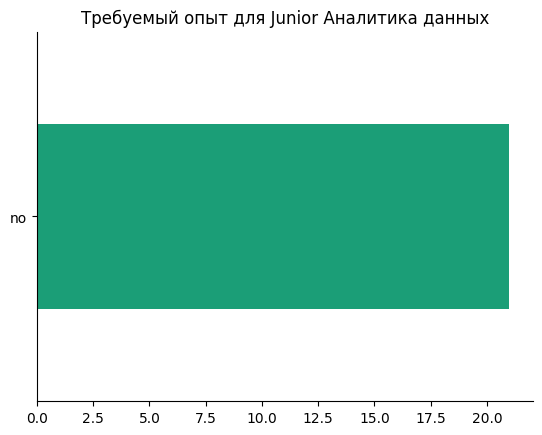

In [443]:
data_analyst_jun.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

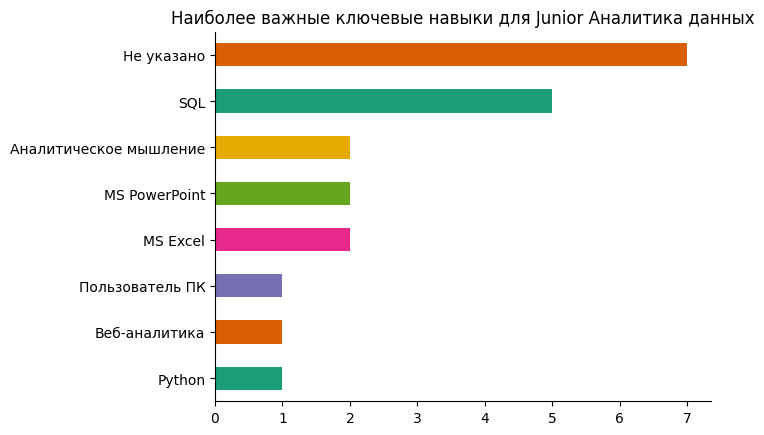

In [444]:
data_analyst_jun.groupby('main_key_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

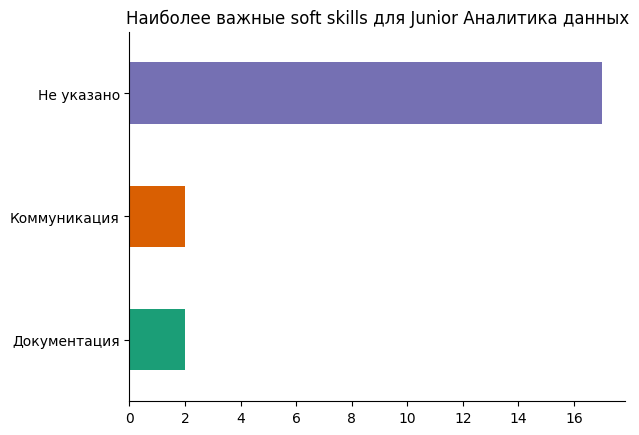

In [445]:
data_analyst_jun.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')
plt.show()

Text(0.5, 0, '')

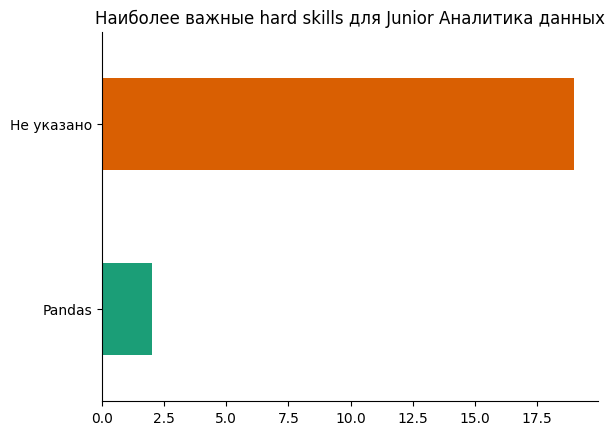

In [446]:
data_analyst_jun.groupby('main_hard_skills').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Junior Аналитик данных* для компаний на рынке это:

1. Опыт работы: без опыта работы
2. Hard skills: Python (в частности библиотекой pandas), SQL, MS Excel, Power Point, веб-аналитика и владение ПК
3. Soft skills: коммуникативные способности, аналитический склад ума и работа с документацией

-----
### Junior+ "Аналитик данных"

In [447]:
data_analyst_jun_plus = data_analyst.query('experience == "Junior+"')

In [448]:
data_analyst_jun_plus[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
2,Не указано,Не указано,Data Catalog,1-3
3,Не указано,Не указано,Python,1-3
4,Не указано,Документация,Business Intelligence Systems,1-3
5,Не указано,Документация,Не указано,1-3
7,Не указано,Не указано,MS Excel,1-3
...,...,...,...,...
402,Не указано,Не указано,Аналитическое мышление,1-3
404,Не указано,Документация,Power Query,1-3
405,Не указано,Не указано,Не указано,1-3
412,Не указано,Аналитическое мышление,Не указано,1-3


Text(0.5, 0, '')

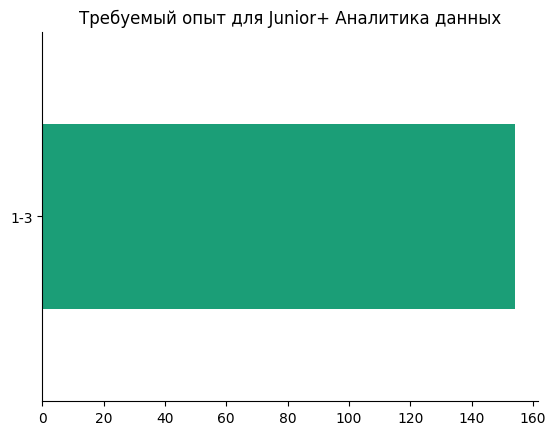

In [449]:
data_analyst_jun_plus.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

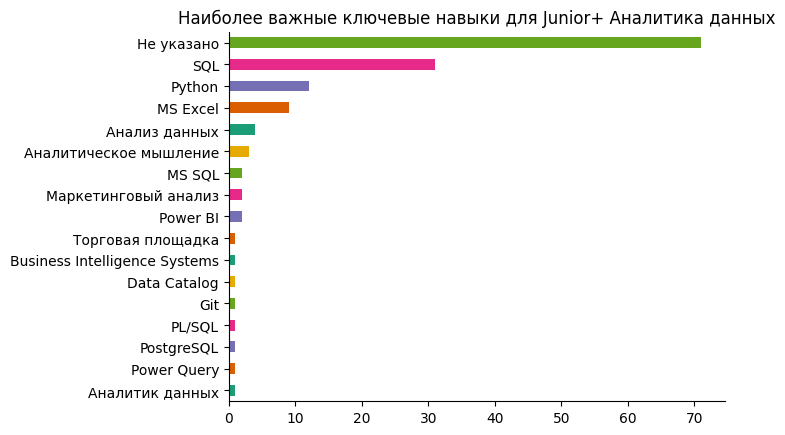

In [450]:
data_analyst_jun_plus.groupby('main_key_skills')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

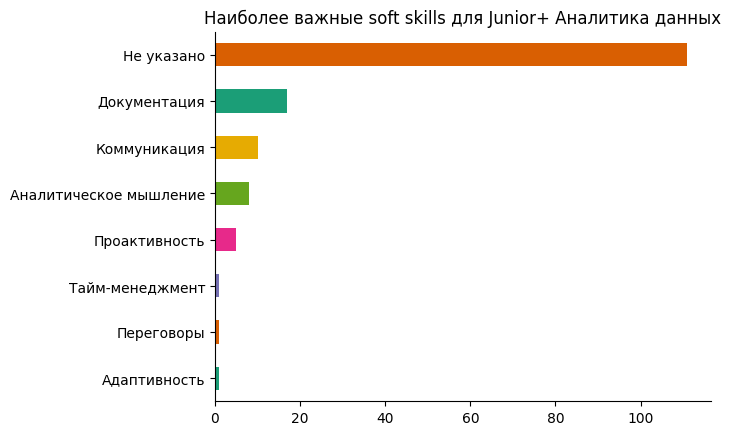

In [451]:
data_analyst_jun_plus.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')
plt.show()

Text(0.5, 0, '')

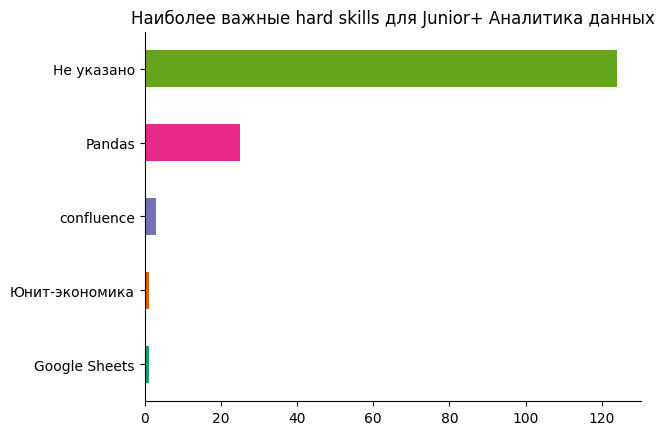

In [452]:
data_analyst_jun_plus.groupby('main_hard_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Junior+ Аналитик данных* для компаний на рынке это:

1. Опыт работы: 1-3 года
2. Hard skills: Python (в частности библиотекой pandas), confluence, Юнит-экономика, SQL (MS SQL, PL/SQL, PostgreSQL), MS Excel (Power Query), Google Sheets, Power BI, Business Intelligence Systems и Git
3. Soft skills: коммуникативные способности, аналитический склад ума и работа с документацией, проактивность, тайм-менеджмент, умение вести переговоры и адаптивность

-----
### Middle "Аналитик данных"

In [453]:
data_analyst_middle = data_analyst.query('experience == "Middle"')

In [454]:
data_analyst_middle[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
9,Не указано,Коммуникация,Python,3-6
18,Юнит-экономика,Не указано,JavaScript,3-6
24,Не указано,Не указано,SQL,3-6
25,Pandas,Не указано,Python,3-6
31,Не указано,Документация,Power BI,3-6
...,...,...,...,...
391,Pandas,Не указано,SQL,3-6
406,Не указано,Не указано,Не указано,3-6
407,Не указано,Проактивность,Не указано,3-6
408,Pandas,Не указано,Python,3-6


Text(0.5, 0, '')

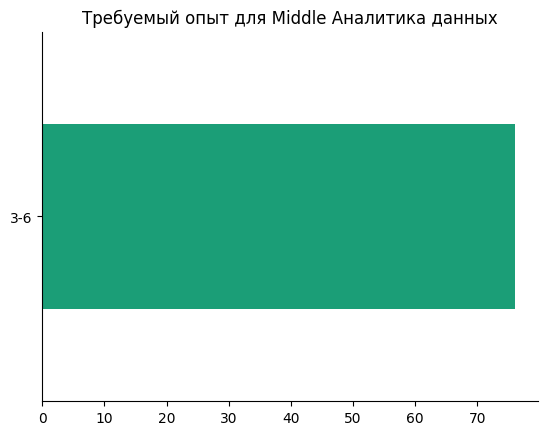

In [455]:
data_analyst_middle.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

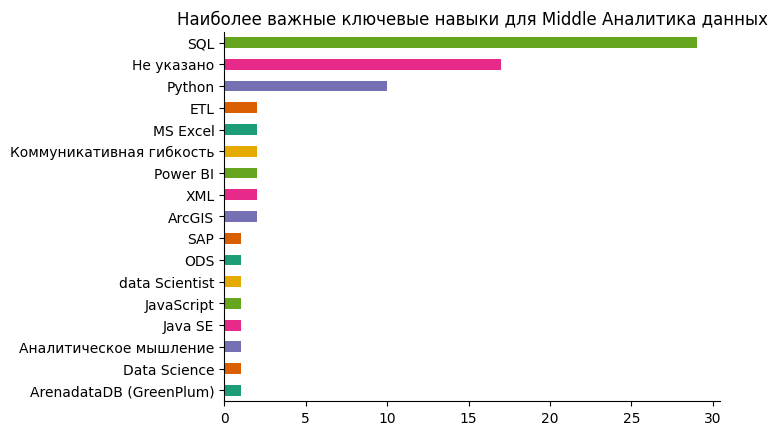

In [456]:
data_analyst_middle.groupby('main_key_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

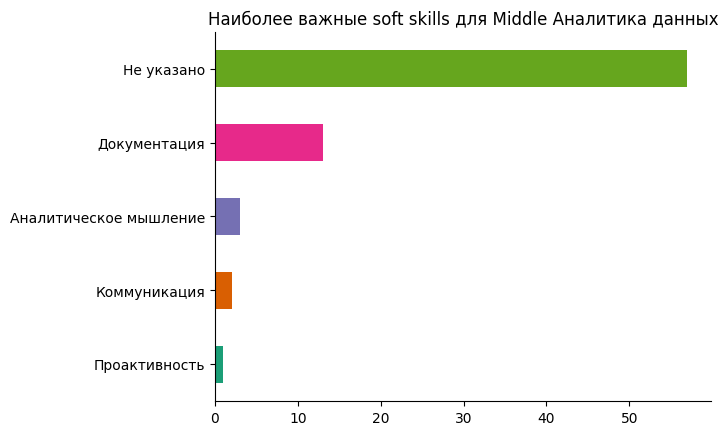

In [457]:
data_analyst_middle.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

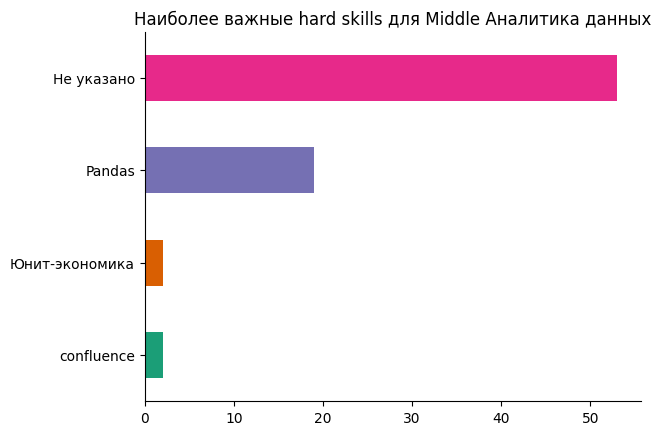

In [458]:
data_analyst_middle.groupby('main_hard_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Middle Аналитик данных* для компаний на рынке это:

1. Опыт работы: 3-6 лет
2. Hard skills: Python (в частности библиотекой pandas), confluence, юнит-экономика, SQL, MS Excel, ETL, Power BI, XML, ArcGIS, SAP, ODS, Data Science, JavaScript, Java SE, ArenadataDB (GreenPlum)
3. Soft skills: коммуникативные способности, аналитический склад ума и работа с документацией, проактивность

-----
### Senior "Аналитик данных"

In [459]:
data_analyst_senior = data_analyst.query('experience == "Senior"')

In [460]:
data_analyst_senior[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
148,Не указано,Коммуникация,Big Data,6+


**ВЫВОД:**

На данном этапе нельзя сделать точного описания идеального *Senior Аналитика*, так как в данных представлена лишь одна вакансия для данного грейда, в которой представлены следующие требования:

1. Опыт работы: 6+ лет
2. Hard skills: Big Data
3. Soft skills: коммуникативные способности

**ВЫВОД ПО РАЗДЕЛУ:**

После анализа вакансий "*Аналитик данных*" можно сумировать требования, которые чаще всего выдвигают компании к специалистам данного направления:

1. Опыт работы зависит от грейда специалиста
2. Наиболее важными hard skills являются: Python (библиотека pandas), SQL, MS Excel и confluence
3. Наиболее важными soft skills являются: коммуникативные способности, аналитический склад ума и работа с документацией
______

-----
##*Наиболее желаемые кандидаты на вакансии "Бизес-аналитик"*
- Самые важные hard-skils, самые важные soft-skils, опыт работы;
- По грейдам Junior, Junior+, Middle, Senior.
-----

### Junior "Бизес-аналитик"
<a id="after2"></a>

In [461]:
business_analyst_junior = business_analyst.query('experience == "Junior"')

In [462]:
business_analyst_junior[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
2,Не указано,Документация,Управление проектами,no
5,Не указано,Документация,Управление проектами,no
30,Не указано,Тайм-менеджмент,Не указано,no
33,Не указано,Документация,Не указано,no
93,Не указано,Не указано,Не указано,no
103,Не указано,Документация,ERP-системы на базе 1С,no
145,Не указано,Аналитическое мышление,Не указано,no
195,Не указано,Не указано,SQL,no
265,Не указано,Не указано,Не указано,no
333,Не указано,Коммуникация,Не указано,no


Text(0.5, 0, '')

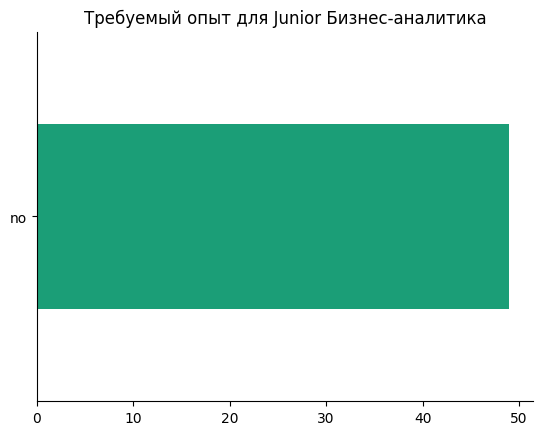

In [463]:
business_analyst_junior.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

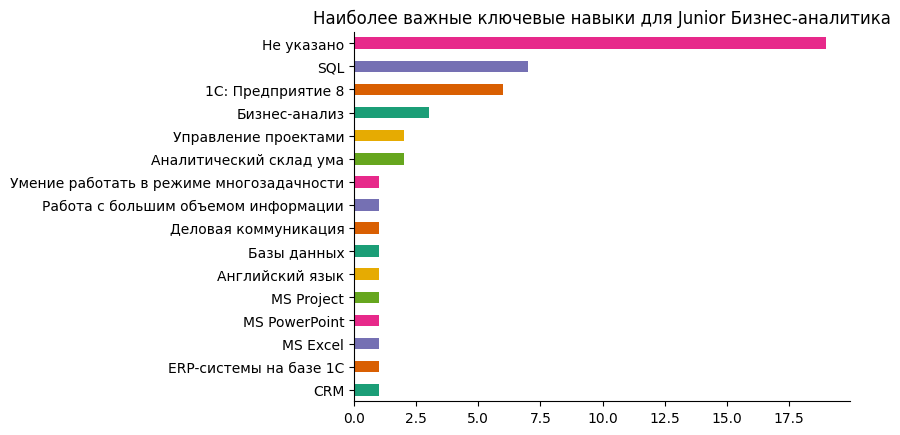

In [464]:
business_analyst_junior.groupby('main_key_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

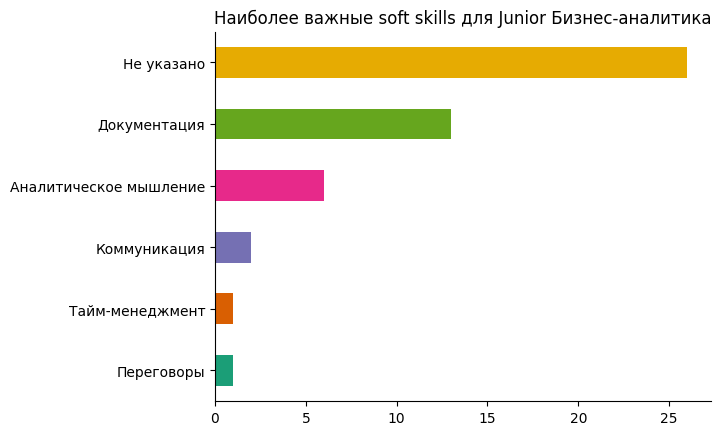

In [465]:
business_analyst_junior.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

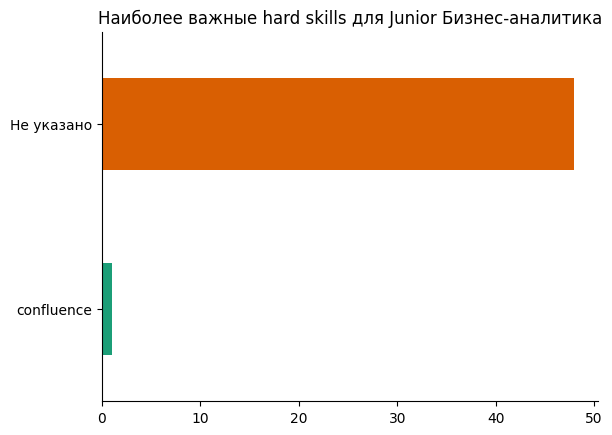

In [466]:
business_analyst_junior.groupby('main_hard_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Junior Бизнес-аналитик* для компаний на рынке это:

1. Опыт работы: без опыта работы
2. Hard skills: confluence, SQL, MS Excel, MS Project, MS PowerPoint, 1С: Предприятие 8, бизнес-анализ, управление проектами, работа с большим объемом информации и базами данных, английский язык, ERP-системы на базе 1C, CRM
3. Soft skills: работа с документацией, аналитический склад ума, коммуникативные способности, тайм-менеджмент, умение работать в режиме многозадачности и вести переговоры

------
### Junior+ "Бизес-аналитик"

In [467]:
business_analyst_junior_plus = business_analyst.query('experience == "Junior+"')

In [468]:
business_analyst_junior_plus[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
0,Не указано,Документация,MS Visio,1-3
3,Не указано,Аналитическое мышление,Не указано,1-3
6,Не указано,Документация,Бизнес-анализ,1-3
8,Не указано,Коммуникация,CRM,1-3
9,Не указано,Документация,Не указано,1-3
...,...,...,...,...
987,Не указано,Коммуникация,BPMN,1-3
990,Не указано,Документация,Не указано,1-3
993,confluence,Не указано,Не указано,1-3
994,Не указано,Не указано,Платежи юридических лиц,1-3


In [469]:
business_analyst_junior_plus['main_key_skills'].unique()

array(['MS Visio', 'Не указано', 'Бизнес-анализ', 'CRM', 'Индустрия 4.0',
       '44-ФЗ', 'Аналитические исследования', 'Аналитическое мышление',
       'Jira', 'бизнес аналитик', 'BPMN', 'MS Project', 'TMS Systems',
       'Коммуникабельность', 'Сбор и анализ информации', 'Python',
       'OLAP кубы', 'Постановка задач разработчикам',
       'Разработка технических заданий', 'MS Excel', 'Анализ данных',
       'Моделирование бизнес процессов', 'личный кабинет', 'SQL',
       'Tableau', 'Автоматизация процессов', 'Конкурентная аналитика',
       'MS SQL', 'Работа с жалобами клиентов', 'Аналитика', 'Scrum', 'UX',
       'MS Office', 'BPMN 1.2,2.0', '1С: Предприятие 8',
       'Системный подход', 'Деловая переписка', 'пытливый гоблин',
       'Luxms BI', 'Оптимизация бизнес-процессов',
       '1С: Управление Торговлей', 'BPML', 'Складская логистика',
       '1С: Зарплата и управление персоналом', 'Статистический анализ',
       'Аналитика продаж', 'Маркетплейс', 'Английский язык',
      

Text(0.5, 0, '')

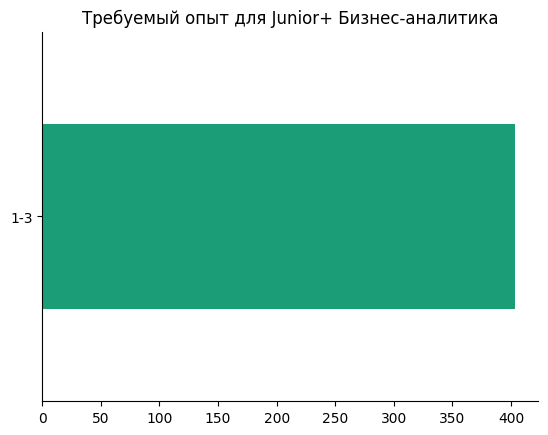

In [470]:
business_analyst_junior_plus.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

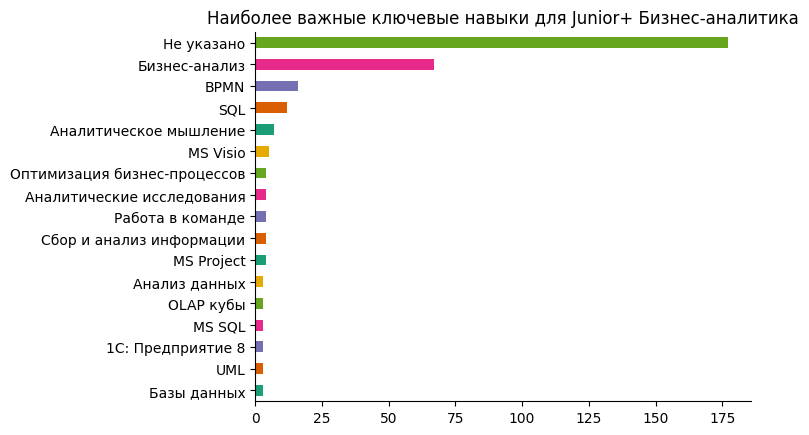

In [471]:
business_analyst_junior_plus.groupby('main_key_skills')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

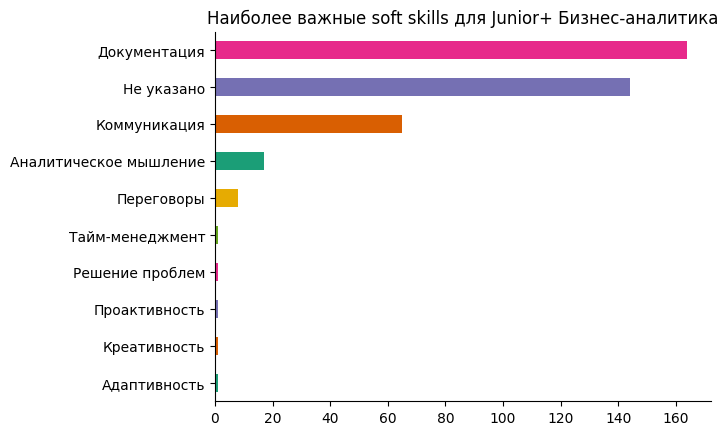

In [472]:
business_analyst_junior_plus.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

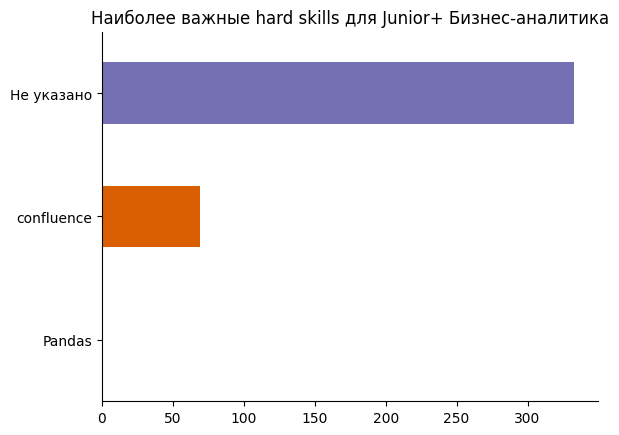

In [473]:
ax = business_analyst_junior_plus.groupby('main_hard_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Junior+ Бизнес-аналитик* для компаний на рынке это:

1. Опыт работы: 1-3 года
2. Hard skills: confluence, Python (в частности библиотека pandas), SQL (MS SQL), MS Project, MS Visio, 1С: Предприятие 8, бизнес-анализ, анализ данных, работа с базами данных, BPMN, OLAP кубы, UML, оптимизация бизнес-процессов, аналитические исследования, сбор и анализ информации
3. Soft skills: работа с документацией, коммуникативные способности, аналитический склад ума, тайм-менеджмент, умение работать в режиме многозадачности и вести переговоры, работа в команде, решение проблем, проактивность, креативность, адаптивность

------
### Middle "Бизес-аналитик"

In [474]:
business_analyst_middle = business_analyst.query('experience == "Middle"')

In [475]:
business_analyst_middle[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
1,Не указано,Коммуникация,Не указано,3-6
7,Не указано,Не указано,Бизнес-анализ,3-6
10,confluence,Документация,Не указано,3-6
14,Не указано,Не указано,Не указано,3-6
17,Не указано,Документация,SQL,3-6
...,...,...,...,...
1006,confluence,Документация,Не указано,3-6
1007,Не указано,Не указано,1С: Документооборот,3-6
1008,Не указано,Документация,Не указано,3-6
1009,Не указано,Документация,Не указано,3-6


Text(0.5, 0, '')

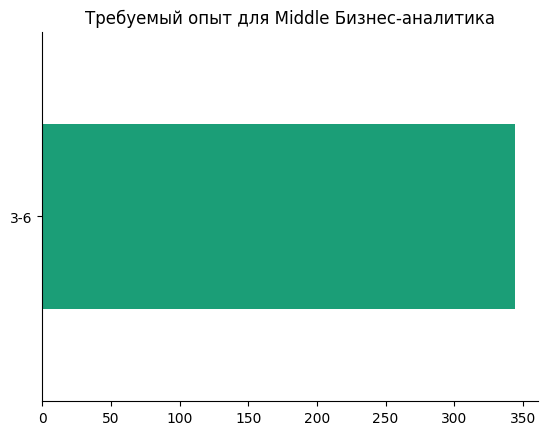

In [476]:
business_analyst_middle.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

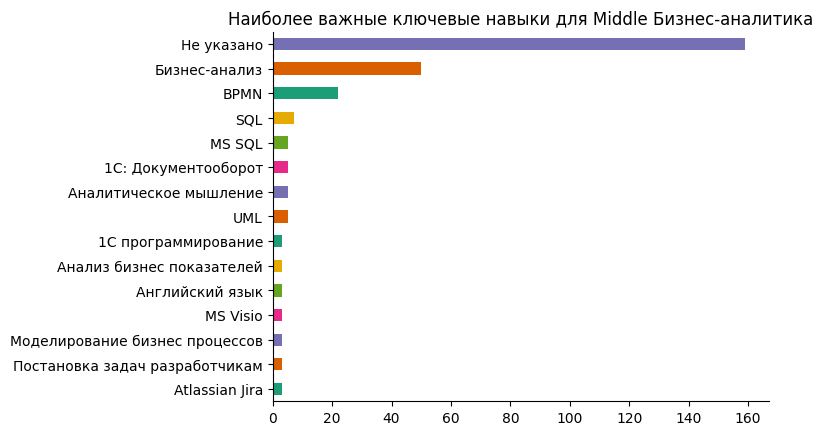

In [477]:
business_analyst_middle.groupby('main_key_skills')['id'].count().sort_values().tail(15).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

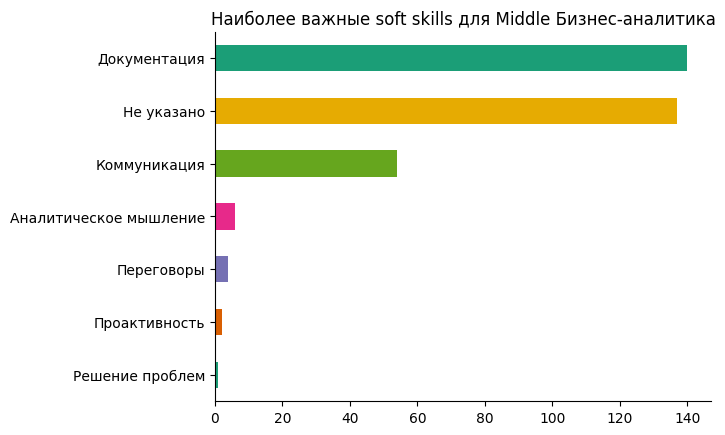

In [478]:
business_analyst_middle.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

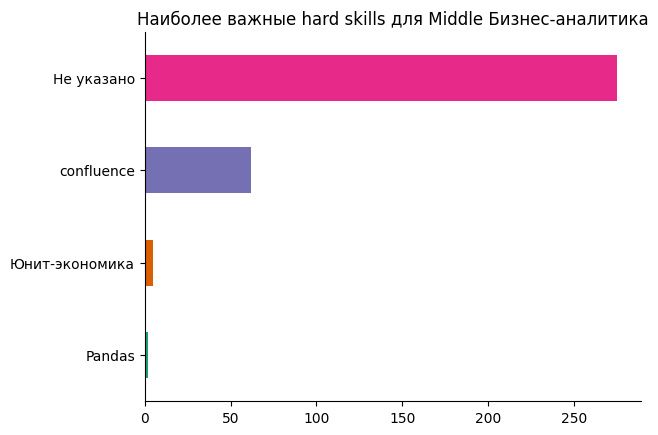

In [479]:
business_analyst_middle.groupby('main_hard_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Middle Бизнес-аналитик* для компаний на рынке это:

1. Опыт работы: 3-6 лет
2. Hard skills: confluence, юнит-экономика, Python (в частности библиотека pandas), SQL (MS SQL), MS Project, MS Visio, 1C: Документооборот, 1C программирование, бизнес-анализ, анализ бизнес показателей, английский язык, BPMN, UML, моделирование бизнес процессов, постановка задач разработчикам, Atlassian Jira
3. Soft skills: работа с документацией, коммуникативные способности, аналитический склад ума, умение вести переговоры, решение проблем, проактивность

------
### Senior "Бизес-аналитик"

In [480]:
business_analyst_senior = business_analyst.query('experience == "Senior"')

In [481]:
business_analyst_senior[['main_hard_skills', 'main_soft_skills', 'main_key_skills', 'years_experience']]

,main_hard_skills,main_soft_skills,main_key_skills,years_experience
80,Не указано,Коммуникация,Не указано,6+
81,Не указано,Коммуникация,Не указано,6+
205,Не указано,Документация,Не указано,6+
303,Не указано,Не указано,Не указано,6+
352,Не указано,Документация,Не указано,6+
377,Не указано,Коммуникация,MS Excel,6+
523,Не указано,Документация,BPMN,6+
563,Не указано,Документация,Анализ данных,6+
712,Не указано,Не указано,Не указано,6+
766,Не указано,Не указано,Не указано,6+


Text(0.5, 0, '')

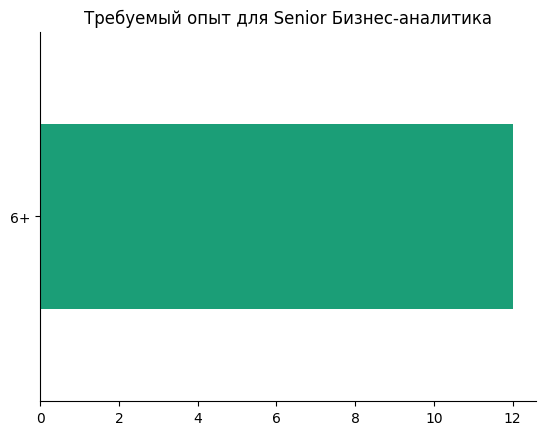

In [482]:
business_analyst_senior.groupby('years_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Требуемый опыт для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

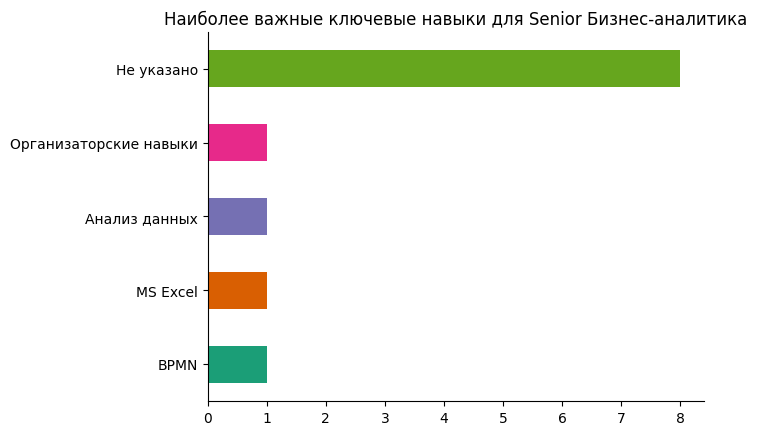

In [483]:
business_analyst_senior.groupby('main_key_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные ключевые навыки для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

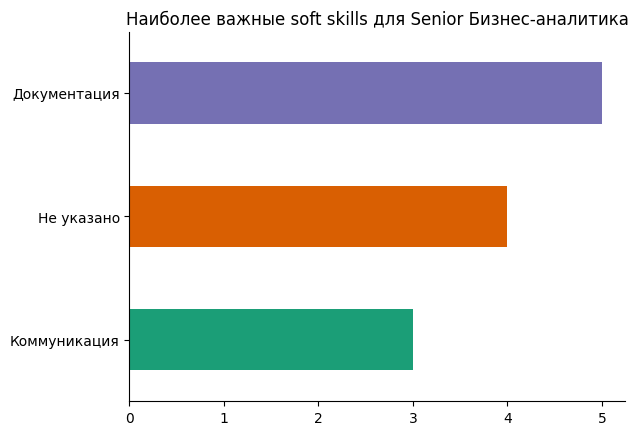

In [484]:
business_analyst_senior.groupby('main_soft_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные soft skills для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

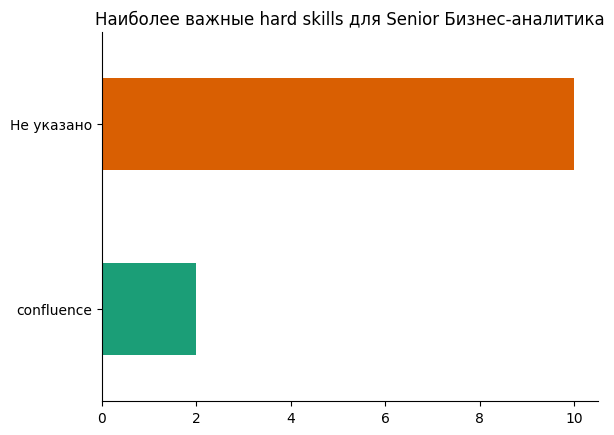

In [485]:
business_analyst_senior.groupby('main_hard_skills')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Наиболее важные hard skills для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, идеальный *Senior Бизнес-аналитик* для компаний на рынке это:

1. Опыт работы: 6+ лет
2. Hard skills: confluence, MS Excel, BPMN, анализ данных
3. Soft skills: работа с документацией, коммуникативные способности, организаторские навыки

**ВЫВОДЫ ПО РАЗДЕЛУ:**

После анализа вакансий "*Бизнес-аналитик*" можно сумировать требования, которые чаще всего выдвигают компании к специалистам данного направления:
1. Опыт работы зависит от грейда специалиста
2. Наиболее важными hard skills являются: SQL (MS SQL), MS Visio и BPMN
3. Наиболее важными soft skills являются: коммуникативные способности, аналитический склад ума, работа с документацией и умение вести переговоры
_____

-----
##*Типичное места работы для "Аналитика данных"*
- ТОП-работодателей, зарплата, тип занятости, график работы;
- По грейдам Junior, Junior+, Middle, Senior.
-----

### Junior "Аналитик данных"
<a id="after3"></a>

In [486]:
data_analyst_jun[['employer', 'salary_bin', 'employment', 'schedule']]

,employer,salary_bin,employment,schedule
19,"МАГНИТ, Розничная сеть",Меньше 100 тысяч,Полная занятость,Полный день
28,СБЕР,ЗП не указана,Полная занятость,Полный день
58,DNS Технологии,ЗП не указана,Полная занятость,Полный день
121,Ростелеком - Центры обработки данных,ЗП не указана,Полная занятость,Полный день
182,МТС,ЗП не указана,Стажировка,Полный день
191,Центральный банк Российской Федерации,ЗП не указана,Полная занятость,Полный день
201,СБЕР,ЗП не указана,Полная занятость,Полный день
221,ГБУ МО МОМИАЦ,ЗП не указана,Полная занятость,Полный день
225,Газпромбанк,ЗП не указана,Полная занятость,Полный день
238,"Согласие, страховая компания",ЗП не указана,Полная занятость,Полный день


Text(0.5, 0, '')

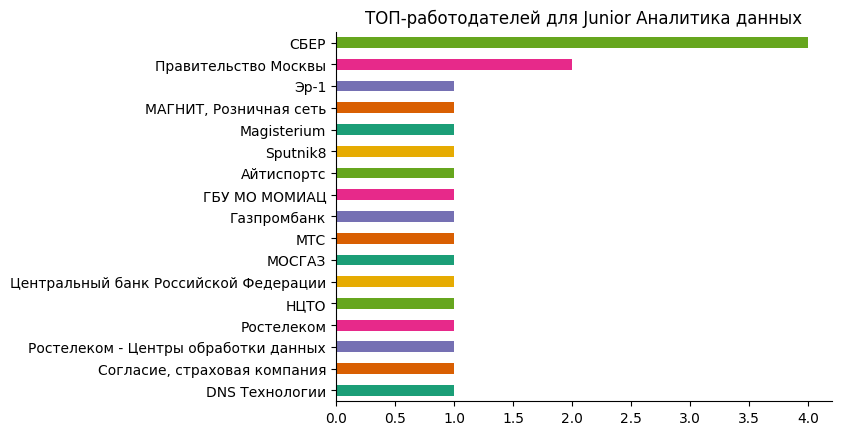

In [487]:
data_analyst_jun.groupby('employer')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

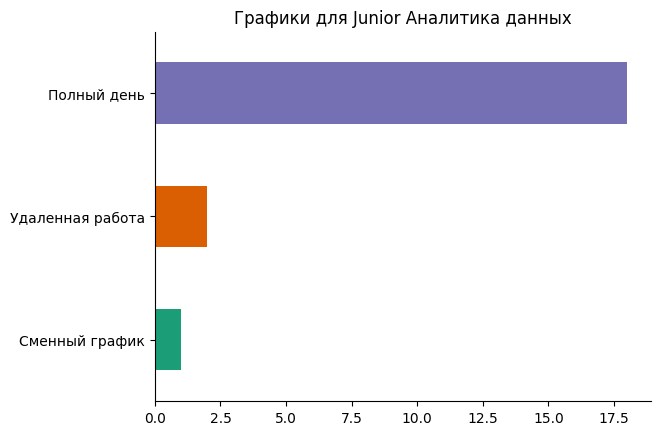

In [488]:
data_analyst_jun.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

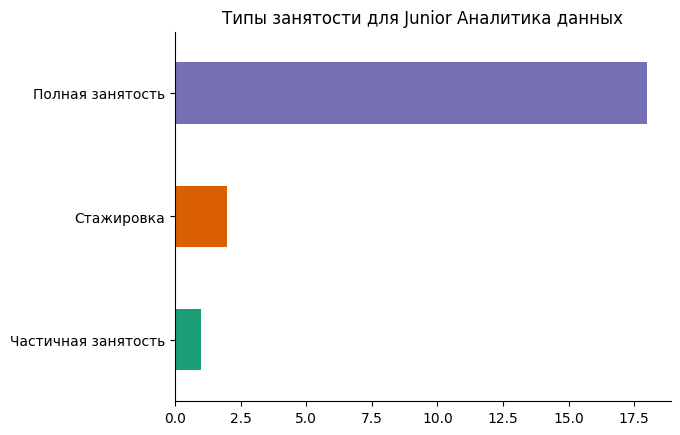

In [489]:
data_analyst_jun.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

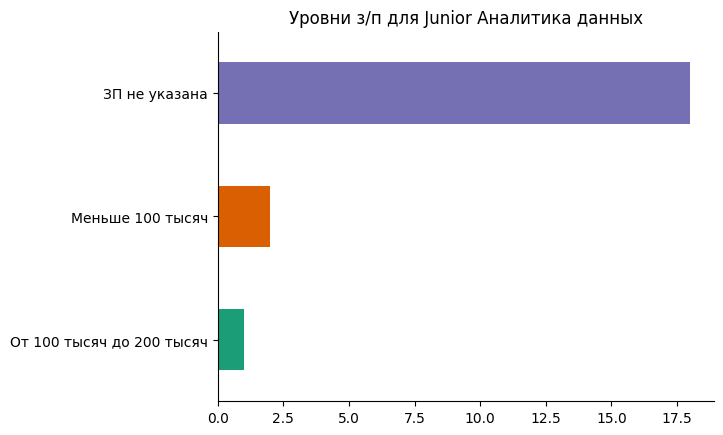

In [490]:
data_analyst_jun.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Junior Аналитика данных')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Junior Аналитика данных*, основываясь на представленных вакансиях, это:

1. Компании: СБЕР, Правительство Москвы
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще до 100 тыс.руб.

-----
### Junior+ "Аналитик данных"

In [491]:
data_analyst_jun_plus[['employer', 'salary_bin', 'employment', 'schedule']]

,employer,salary_bin,employment,schedule
2,МТС,ЗП не указана,Полная занятость,Полный день
3,ЭлРос,ЗП не указана,Полная занятость,Полный день
4,EVYAP International Russia,ЗП не указана,Полная занятость,Полный день
5,Группа компаний АГРОЭКО,ЗП не указана,Полная занятость,Полный день
7,Кадровый Центр Департамента здравоохранения го...,ЗП не указана,Полная занятость,Полный день
...,...,...,...,...
402,Россельхозбанк,ЗП не указана,Полная занятость,Полный день
404,Акира Оил,ЗП не указана,Полная занятость,Удаленная работа
405,СБЕР,ЗП не указана,Частичная занятость,Полный день
412,СБЕР,ЗП не указана,Полная занятость,Полный день


Text(0.5, 0, '')

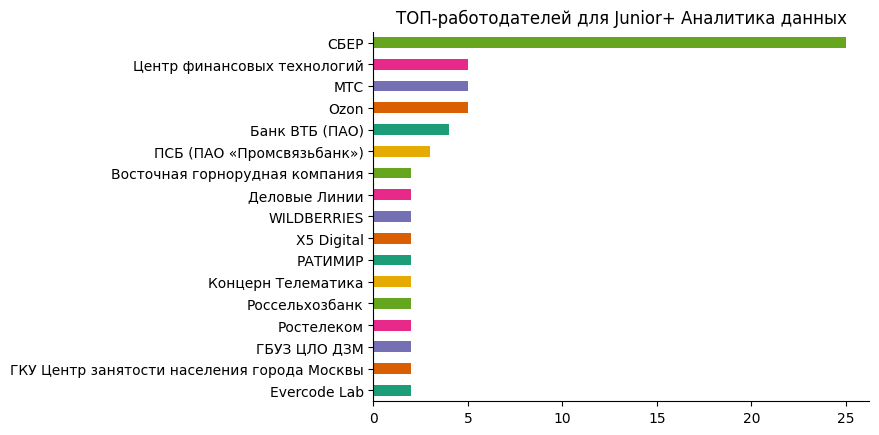

In [492]:
data_analyst_jun_plus.groupby('employer')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

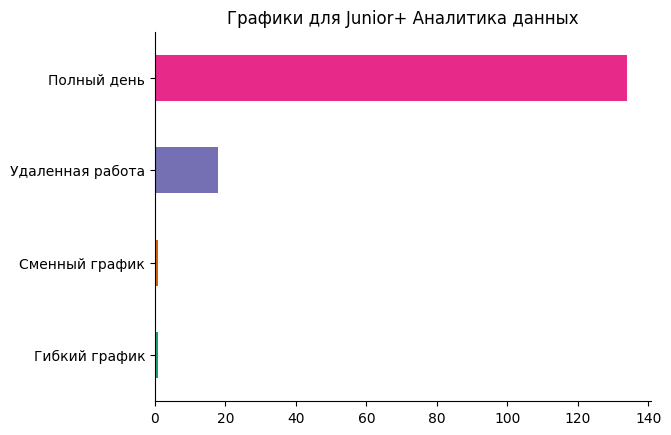

In [493]:
data_analyst_jun_plus.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

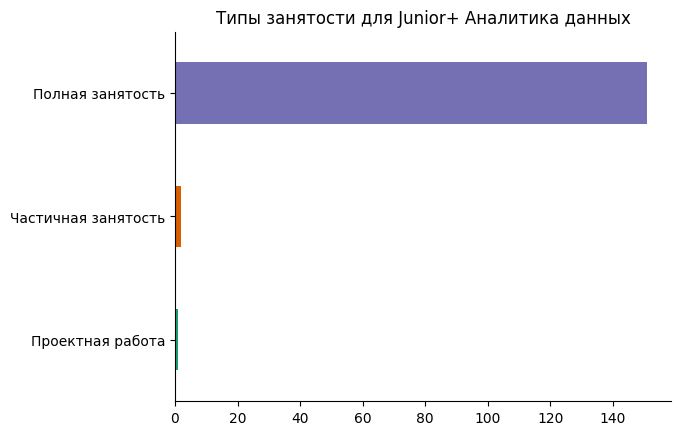

In [494]:
data_analyst_jun_plus.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

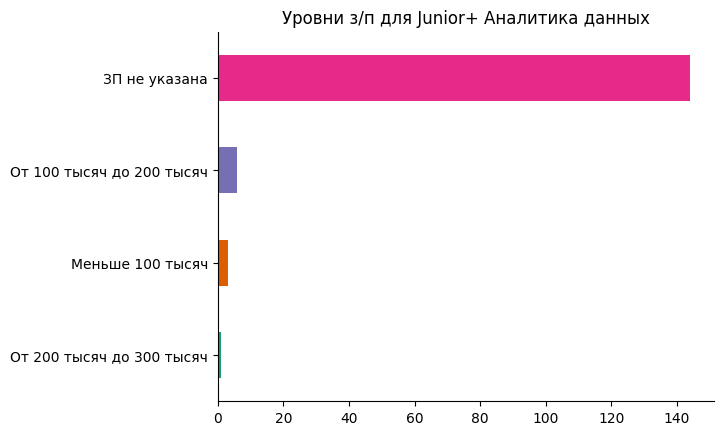

In [495]:
data_analyst_jun_plus.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Junior+ Аналитика данных')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Junior+ Аналитика данных*, основываясь на представленных вакансиях, это:

1. Компании: СБЕР, Центр финансовых технологий, MTC, Ozon, Банк ВТБ (ПАО), ПСБ (ПАО «Промсвязьбанк»)
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще от 100 тыс. до 200 тыс. руб.

____
### Middle "Аналитик данных"

In [496]:
data_analyst_middle[['employer', 'salary_bin', 'employment', 'schedule']]

,employer,salary_bin,employment,schedule
9,Страховая компания Пульс,ЗП не указана,Полная занятость,Полный день
18,МТС,ЗП не указана,Полная занятость,Полный день
24,Самокат (ООО Умный ритейл),ЗП не указана,Полная занятость,Полный день
25,Займиго МФК,ЗП не указана,Полная занятость,Полный день
31,DPD в России,ЗП не указана,Полная занятость,Удаленная работа
...,...,...,...,...
391,ИНТЕЛПРО,Больше 300 тысяч,Полная занятость,Удаленная работа
406,"Бристоль, сеть магазинов",От 200 тысяч до 300 тысяч,Полная занятость,Полный день
407,Спортмастер,ЗП не указана,Полная занятость,Удаленная работа
408,СБЕР,ЗП не указана,Полная занятость,Полный день


Text(0.5, 0, '')

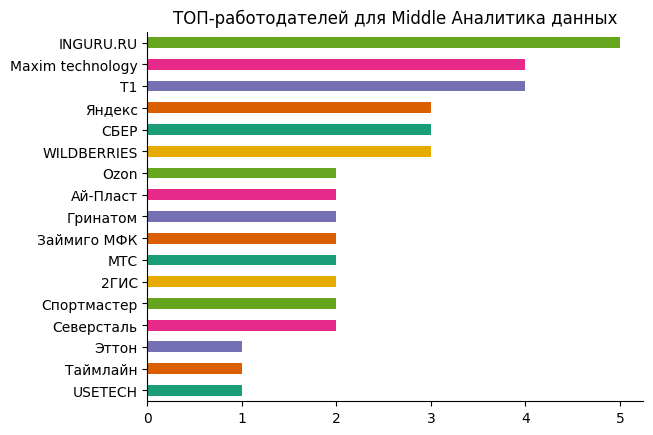

In [497]:
data_analyst_middle.groupby('employer')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

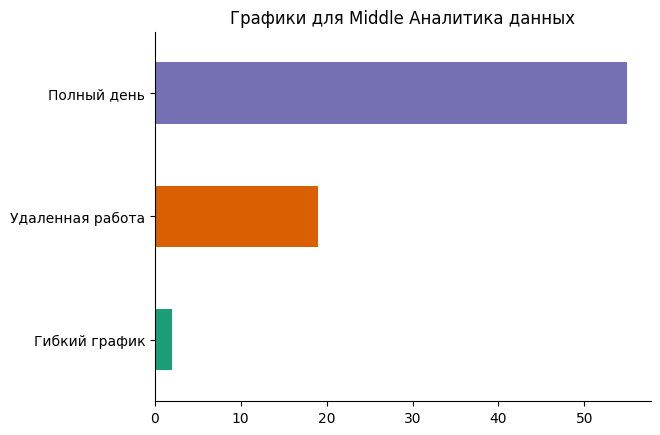

In [498]:
data_analyst_middle.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

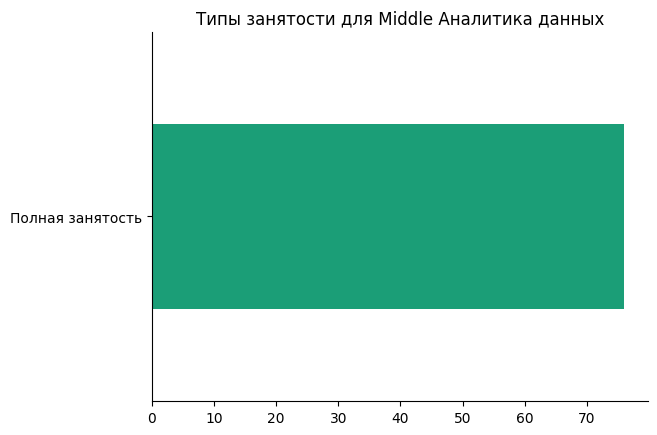

In [499]:
data_analyst_middle.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

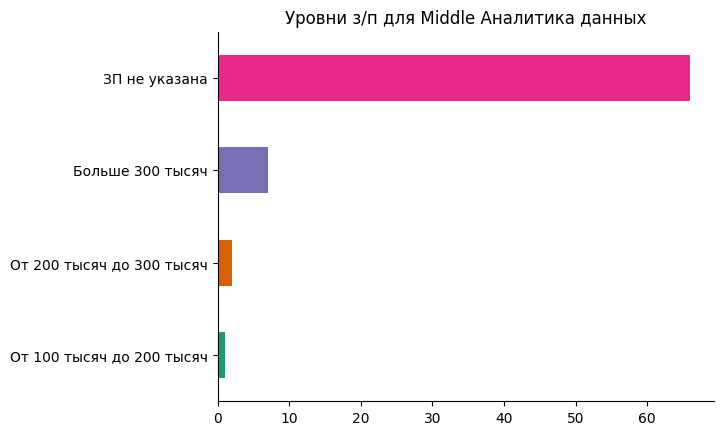

In [500]:
data_analyst_middle.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Middle Аналитика данных')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Middle Аналитика данных*, основываясь на представленных вакансиях, это:

1. Компании: INGURU.RU, Maxim technology, T1, Яндекс, СБЕР, WILDBERRIES
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще больше 300 тыс.руб.

____
### Senior "Аналитик данных"

In [501]:
data_analyst_senior[['employer', 'salary_bin', 'employment', 'schedule']]

,employer,salary_bin,employment,schedule
148,JSA Group,ЗП не указана,Полная занятость,Полный день


**ВЫВОД:**

На данном этапе нельзя сделать точного описания типичного места работы *Senior Аналитика*, так как в данных представлена лишь одна вакансия для данного грейда, в которой представлены следующие условия:

1. Компании: JSA Group
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается

**ВЫВОД ПО РАЗДЕЛУ:**

После анализа работодателей "Аналитиков данных" можно сумировать условия, которые чаще всего предоставляют компании специалистам данного направления:

1. Компании разнородны, одна из самых распространенных - СБЕР
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п в большей части не указывается работодателем


_____

-----
##*Типичное места работы для "Бизнес-аналитика"*
- ТОП-работодателей, зарплата, тип занятости, график работы;
- По грейдам Junior, Junior+, Middle, Senior.
-----

### Junior "Бизнес-аналитик"
<a id="after4"></a>

In [502]:
business_analyst_junior[['employer', 'salary_bin', 'employment', 'schedule']]

,employer,salary_bin,employment,schedule
2,Газпром нефть,ЗП не указана,Полная занятость,Полный день
5,Газпром нефть,ЗП не указана,Полная занятость,Полный день
30,Совкомбанк,ЗП не указана,Полная занятость,Полный день
33,Комус,ЗП не указана,Полная занятость,Гибкий график
93,СЗ Эдельвейс-1,ЗП не указана,Полная занятость,Полный день
103,КРОК,ЗП не указана,Стажировка,Полный день
145,"РЕСО-Гарантия, САО",ЗП не указана,Полная занятость,Гибкий график
195,"МАГНИТ, Розничная сеть",Меньше 100 тысяч,Полная занятость,Удаленная работа
265,АК АЛРОСА,ЗП не указана,Полная занятость,Полный день
333,Панавто,От 100 тысяч до 200 тысяч,Полная занятость,Полный день


Text(0.5, 0, '')

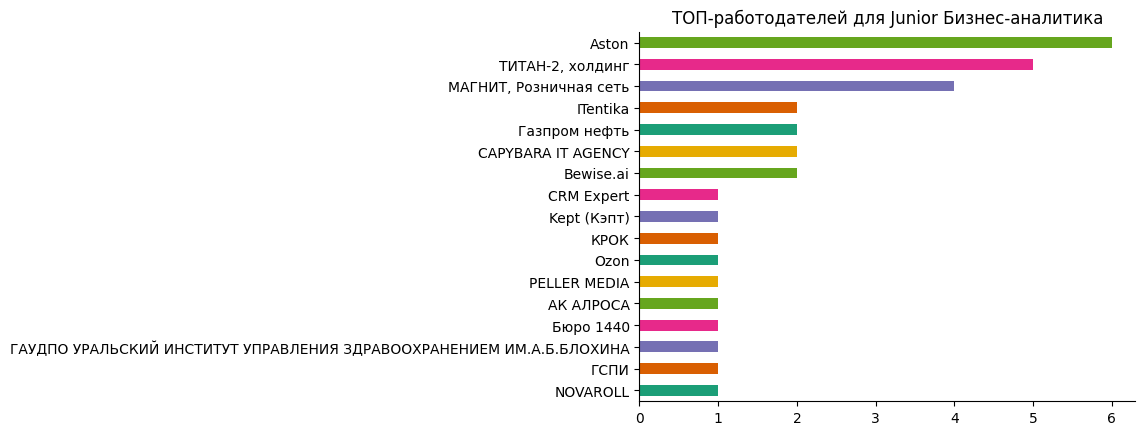

In [503]:
business_analyst_junior.groupby('employer')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

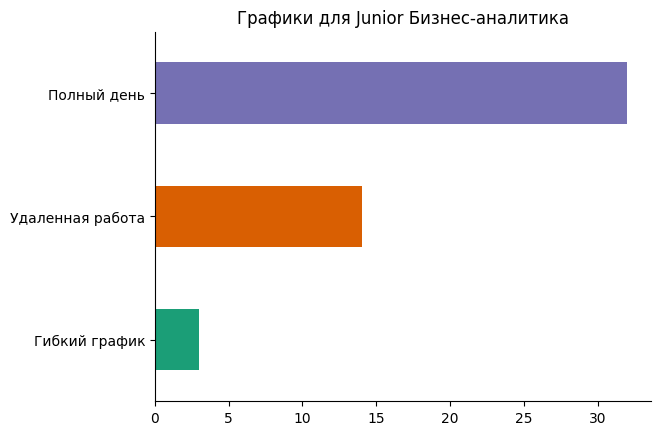

In [504]:
business_analyst_junior.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

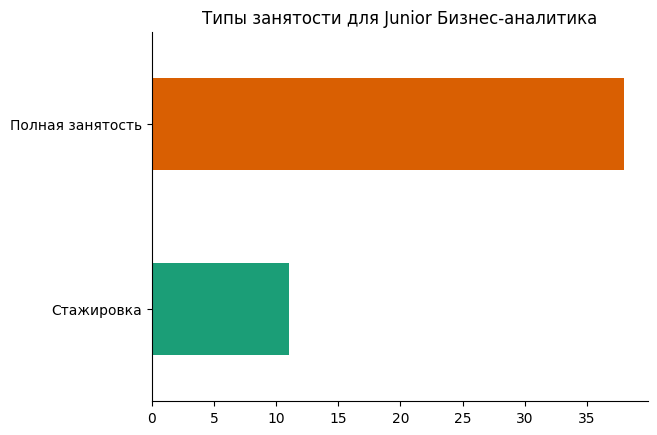

In [505]:
business_analyst_junior.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

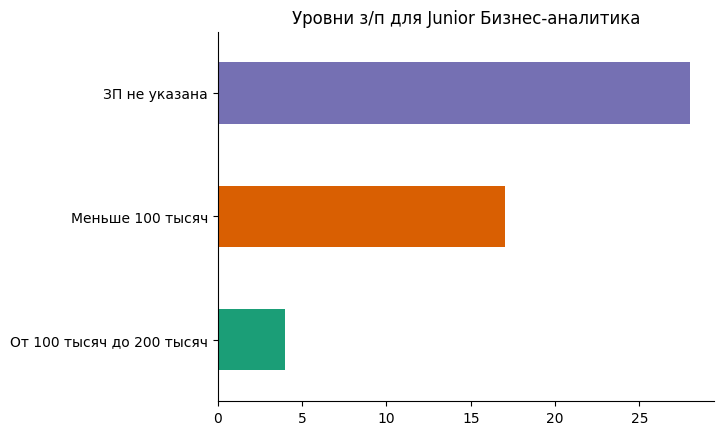

In [506]:
business_analyst_junior.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Junior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Junior Бизнес-аналитика*, основываясь на представленных вакансиях, это:

1. Компании: Aston, ТИТАН-2, МАГНИТ, Mentika, Газпром нефть, CAPYBARA IT AGENCY, Bewise.ai
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще до 100 тыс.руб.

-----
### Junior+ "Бизнес-аналитик"

In [507]:
business_analyst_junior_plus[['employer', 'salary_bin', 'employment', 'schedule']]

,employer,salary_bin,employment,schedule
0,Спортмастер,ЗП не указана,Полная занятость,Полный день
3,MedmaGroup,ЗП не указана,Полная занятость,Полный день
6,Комус,ЗП не указана,Полная занятость,Гибкий график
8,Совкомбанк,ЗП не указана,Полная занятость,Полный день
9,Банк ВТБ (ПАО),ЗП не указана,Полная занятость,Полный день
...,...,...,...,...
987,БФТ-Холдинг (Бюджетные и Финансовые Технологии),ЗП не указана,Полная занятость,Полный день
990,БФТ-Холдинг (Бюджетные и Финансовые Технологии),ЗП не указана,Полная занятость,Полный день
993,СБЕР,ЗП не указана,Полная занятость,Полный день
994,Ак Барс Банк,ЗП не указана,Полная занятость,Полный день


Text(0.5, 0, '')

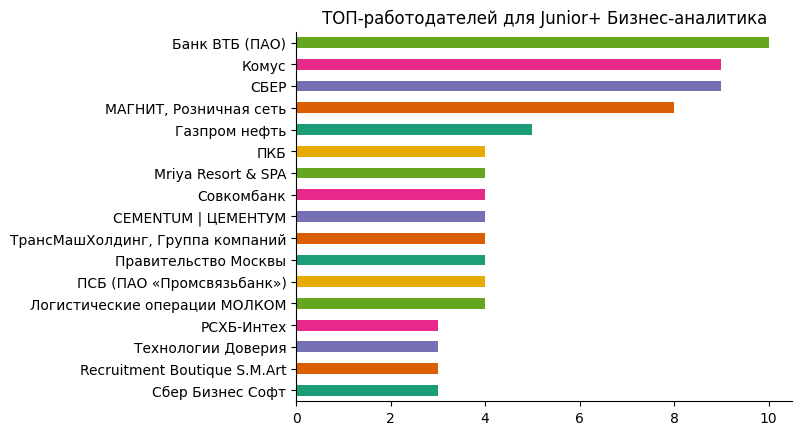

In [508]:
business_analyst_junior_plus.groupby('employer')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

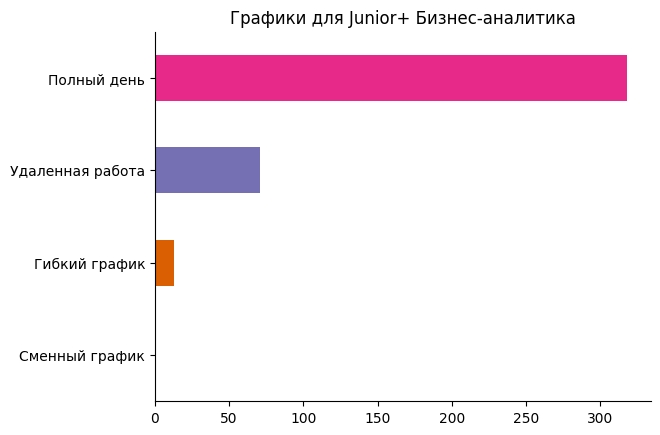

In [509]:
business_analyst_junior_plus.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

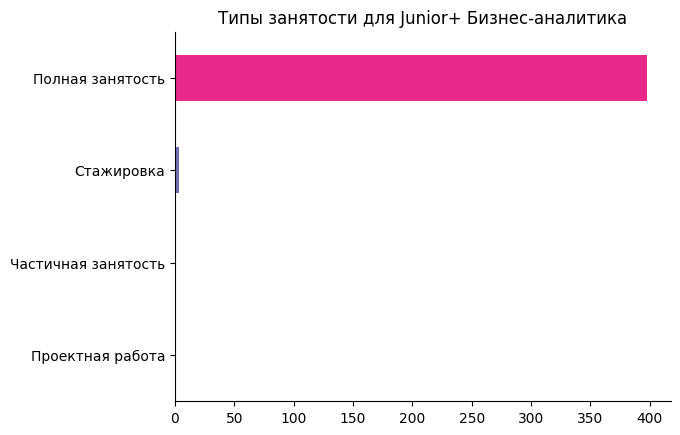

In [510]:
business_analyst_junior_plus.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

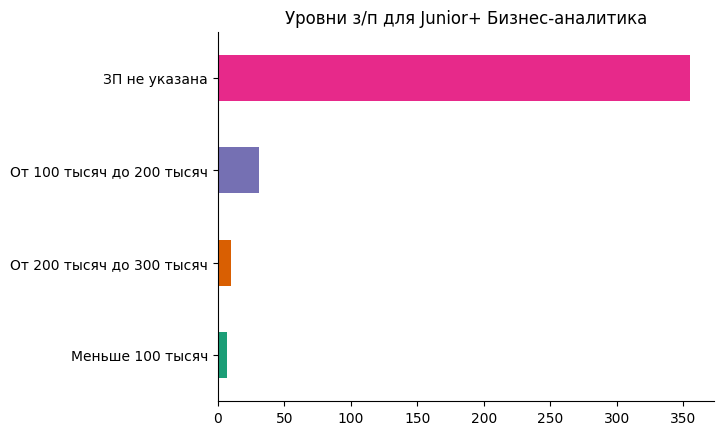

In [511]:
business_analyst_junior_plus.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Junior+ Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Junior+ Бизнес-аналитика*, основываясь на представленных вакансиях, это:

1. Компании: Банк ВТБ (ПАО), Комус, СБЕР, МАГНИТ, Газпром нефть, AGENCY, Bewise.ai
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще от 100 тыс. до 200 тыс.руб.

-----
### Middle "Бизнес-аналитик"

Text(0.5, 0, '')

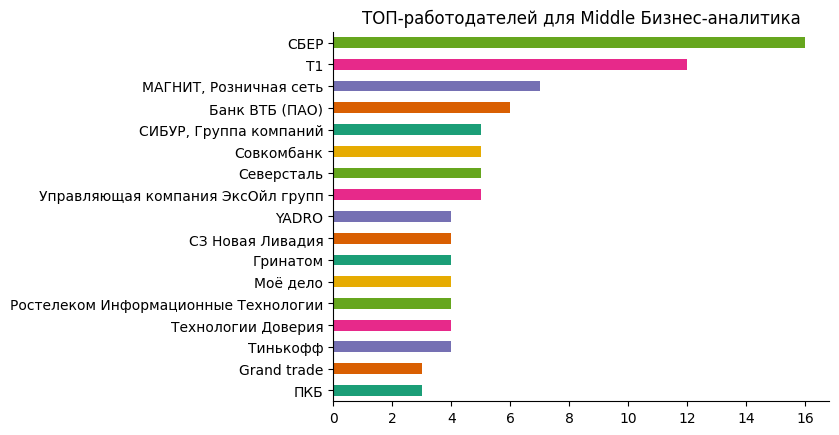

In [512]:
business_analyst_middle.groupby('employer')['id'].count().sort_values().tail(17).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

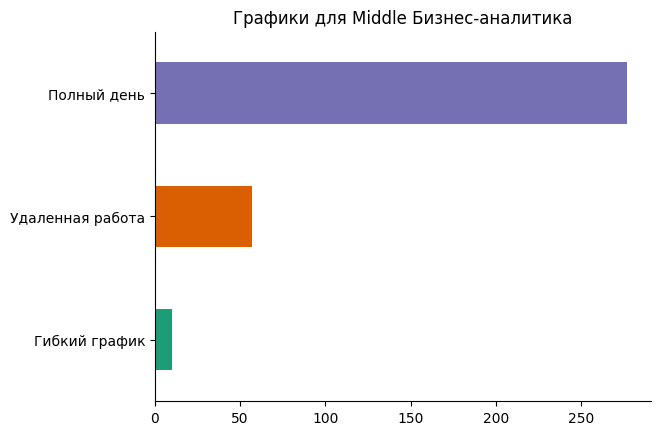

In [513]:
business_analyst_middle.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

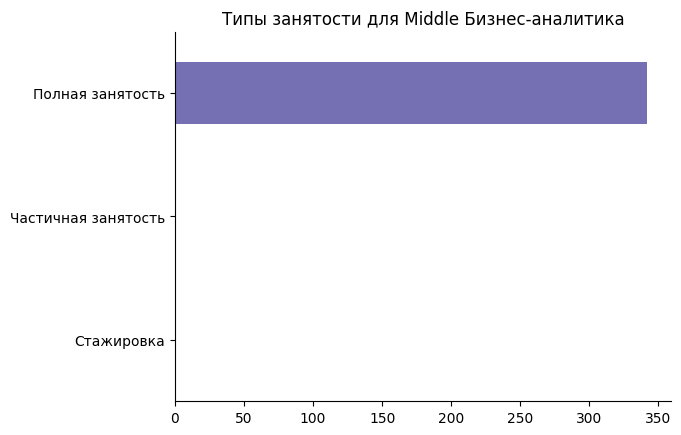

In [514]:
business_analyst_middle.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

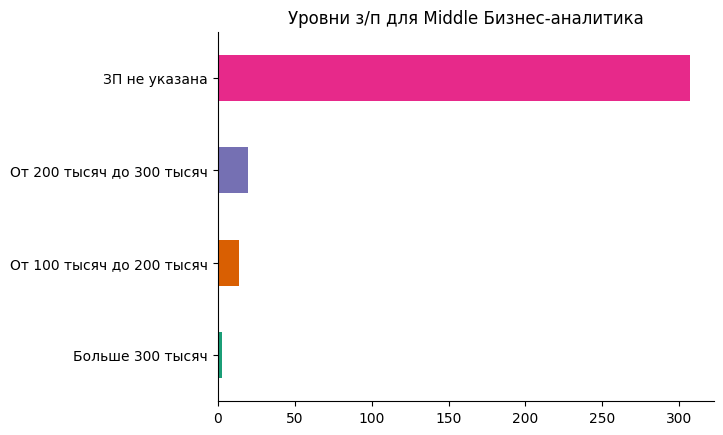

In [515]:
business_analyst_middle.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Middle Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Middle Бизнес-аналитика*, основываясь на представленных вакансиях, это:

1. Компании: СБЕР, T1, МАГНИТ, Банк ВТБ (ПАО), СИБУР, Совкомбанк, Северсталь, ЭксОйл групп
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще от 200 тыс. до 300 тыс.руб.

-----
### Senior "Бизнес-аналитик"

Text(0.5, 0, '')

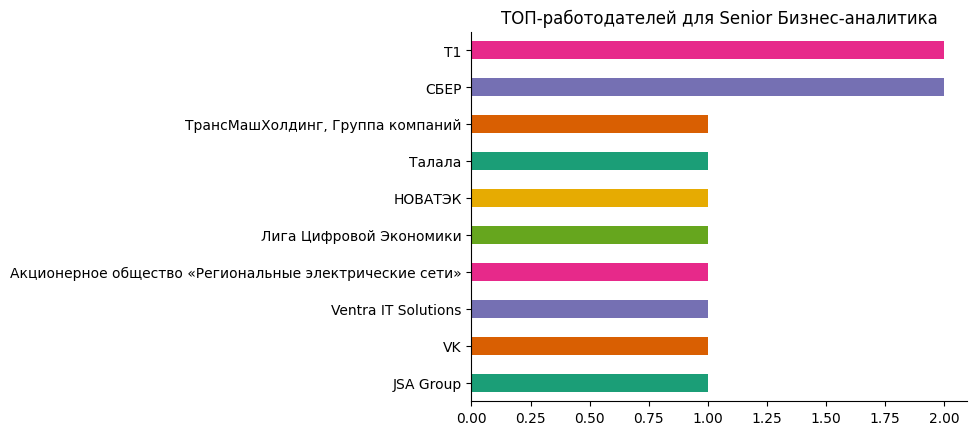

In [516]:
business_analyst_senior.groupby('employer')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('ТОП-работодателей для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

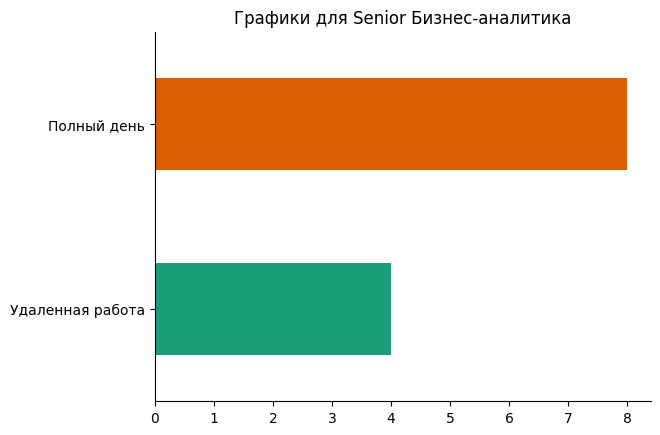

In [517]:
business_analyst_senior.groupby('schedule')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Графики для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

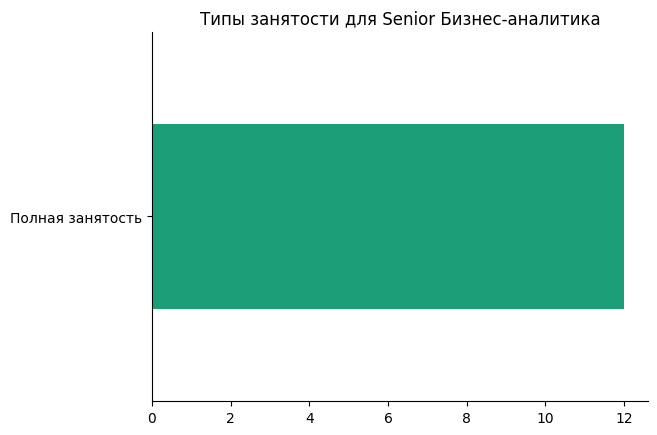

In [518]:
business_analyst_senior.groupby('employment')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Типы занятости для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

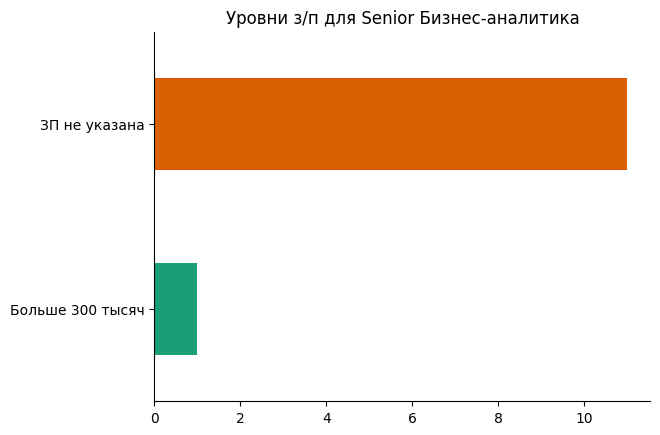

In [519]:
business_analyst_senior.groupby('salary_bin')['id'].count().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Уровни з/п для Senior Бизнес-аналитика')
plt.ylabel('')
plt.xlabel('')

**ВЫВОД:**

На данном этапе можно сделать вывод что, наиболее типичное место работы *Senior Бизнес-аналитика*, основываясь на представленных вакансиях, это:

1. Компании: T1, СБЕР, ТрансМашХолдинг, Группа компаний, Талала, НОВАТЭК, Лига Цифровой Экономики
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п: не указывается, но чаще от 300 тыс.руб.

**ВЫВОД ПО РАЗДЕЛУ:**

После анализа работодателей "Бизнес-аналитиков" можно сумировать условия, которые чаще всего предоставляют компании специалистам данного направления:

1. Компании разнородны, одна из самых распространенных - СБЕР, Магнит и Т1
2. График: полный день
3. Тип занятости: полная занятость
4. Уровень з/п в большей части не указывается работодателем
-------

----
***ВЫВОДЫ ПО ПРОЕКТУ:***
<a id="ending"></a>
----
Инвесторы из фонда «Shut Up and Take My Money» заинтересованы в анализе перспектив их работы в новой для компании области и открыть заведение общественного питания в Москве. Заказчики на данный момент не утвердили никакие дополнительные критерии касательно категории места, его расположения, меню и цены.

В данном исследовании необходимо было выявить различия в предлагаемых вакансиях для Аналитиков данных и Бизнес-аналитиков. Задачи исследования были сформулированы как:
1. Определить наиболее желаемых кандидатов на вакансии Аналитик данных и Бизнес-аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils, опыт работы (для грейдов Junior, Junior+, Middle, Senior).

2. Определить типичное места работы для Аналитика данных и Бизнес-аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы (для грейдов Junior, Junior+, Middle, Senior).

В качестве материала для анализа были получены два файла Excel из PI HH.ru.

Работа над данным проектом была разделена на 4 шага:

1) Изучение общей информации

2) Предобработка данных
- 2.1 Типы данных

- 2.2 Количественные значения
  - 2.2.1 Аналитик данных
  - 2.2.2 Бизнес-аналитик

- 2.3 Качественные значения
  - 2.3.1 Аналитик данных
  - 2.3.2 Бизнес-аналитик


3) Исследовательский анализ данных
- 3.1 "Идеальный кандидат" Аналитик данных
- 3.2 "Идеальный кандидат" Бизнес-аналитик
- 3.3 "Типичное место работы" Аналитика данных
- 3.3 "Типичное место работы" Бизнес-аналитика

4) Вывод про проекту


Так, после завершения проекта, можно дать краткие выводы к поставленным изначально задачам.


----
**"Идеальные кандидаты"**
----
----
**1. Аналитик данных**
----

- Идеальный Junior Аналитик данных:

 Опыт работы: без опыта работы

 Hard skills: Python (в частности библиотекой pandas), SQL, MS Excel, Power Point, веб-аналитика и владение ПК

 Soft skills: коммуникативные способности, аналитический склад ума и работа с документацией



- Идеальный Junior+ Аналитик данных:

 Опыт работы: 1-3 года

 Hard skills: Python (в частности библиотекой pandas), confluence, Юнит-экономика, SQL (MS SQL, PL/SQL, PostgreSQL), MS Excel (Power Query), Google Sheets, Power BI, Business Intelligence Systems и Git

 Soft skills: коммуникативные способности, аналитический склад ума и работа с документацией, проактивность, тайм-менеджмент, умение вести переговоры и адаптивность



- Идеальный Middle Аналитик данных:

 Опыт работы: 3-6 лет

 Hard skills: Python (в частности библиотекой pandas), confluence, юнит-экономика, SQL, MS Excel, ETL, Power BI, XML, ArcGIS, SAP, ODS, Data Science, JavaScript, Java SE, ArenadataDB (GreenPlum)

 Soft skills: коммуникативные способности, аналитический склад ума и работа с документацией, проактивность



- Идеальный Senior Аналитик данных (по одной вакансии):

 Опыт работы: 6+ лет

 Hard skills: Big Data

 Soft skills: коммуникативные способности

----
**2. Бизнес-аналитик**
----

- Идеальный Junior Бизнес-аналитик:

 Опыт работы: без опыта работы

 Hard skills: confluence, SQL, MS Excel, MS Project, MS PowerPoint, 1С: Предприятие 8, бизнес-анализ, управление проектами, работа с большим объемом информации и базами данных, английский язык, ERP-системы на базе 1C, CRM

 Soft skills: работа с документацией, аналитический склад ума, коммуникативные способности, тайм-менеджмент, умение работать в режиме многозадачности и вести переговоры



- Идеальный Junior+ Бизнес-аналитик:

 Опыт работы: 1-3 года

 Hard skills: confluence, Python (в частности библиотека pandas), SQL (MS SQL), MS Project, MS Visio, 1С: Предприятие 8, бизнес-анализ, анализ данных, работа с базами данных, BPMN, OLAP кубы, UML, оптимизация бизнес-процессов, аналитические исследования, сбор и анализ информации

 Soft skills: работа с документацией, коммуникативные способности, аналитический склад ума, тайм-менеджмент, умение работать в режиме многозадачности и вести переговоры, работа в команде, решение проблем, проактивность, креативность, адаптивность



- Идеальный Middle Бизнес-аналитик:

 Опыт работы: 3-6 лет

 Hard skills: confluence, юнит-экономика, Python (в частности библиотека pandas), SQL (MS SQL), MS Project, MS Visio, 1C: Документооборот, 1C программирование, бизнес-анализ, анализ бизнес показателей, английский язык, BPMN, UML, моделирование бизнес процессов, постановка задач разработчикам, Atlassian Jira

 Soft skills: работа с документацией, коммуникативные способности, аналитический склад ума, умение вести переговоры, решение проблем, проактивность




- Идеальный Senior Бизнес-аналитик для компаний на рынке это:

 Опыт работы: 6+ лет

 Hard skills: confluence, MS Excel, BPMN, анализ данных

 Soft skills: работа с документацией, коммуникативные способности, организаторские навыки

----
**"Типичное место работы"**
----
----
**1. Аналитик данных**
----

- Типичное место работы Junior Аналитика данных:

 Компании: СБЕР, Правительство Москвы

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще до 100 тыс.руб.




- Типичное место работы Junior+ Аналитика данных:

 Компании: СБЕР, Центр финансовых технологий, MTC, Ozon, Банк ВТБ (ПАО), ПСБ (ПАО «Промсвязьбанк»)

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще от 100 тыс. до 200 тыс.руб.




- Типичное место работы Middle Аналитика данных:

 Компании: INGURU.RU, Maxim technology, T1, Яндекс, СБЕР, WILDBERRIES

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще больше 300 тыс.руб.




- Типичного места работы Senior Аналитика данных:

 Компании: JSA Group

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается


----
**2. Бизнес-аналитик**
----


- Типичное место работы Junior Бизнес-аналитика:

 Компании: Aston, ТИТАН-2, МАГНИТ, Mentika, Газпром нефть, CAPYBARA IT AGENCY, Bewise.ai

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще до 100 тыс.руб.



- Типичное место работы Junior+ Бизнес-аналитика:

 Компании: Банк ВТБ (ПАО), Комус, СБЕР, МАГНИТ, Газпром нефть, AGENCY, Bewise.ai

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще от 100 тыс. до 200 тыс.руб.



- Типичное место работы Middle Бизнес-аналитика:

 Компании: СБЕР, T1, МАГНИТ, Банк ВТБ (ПАО), СИБУР, Совкомбанк, Северсталь, ЭксОйл групп

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще от 200 тыс. до 300 тыс.руб.




- Типичное место работы Senior Бизнес-аналитика:

 Компании: T1, СБЕР, ТрансМашХолдинг, Группа компаний, Талала, НОВАТЭК, Лига Цифровой Экономики

 График: полный день

 Тип занятости: полная занятость

 Уровень з/п: не указывается, но чаще от 300 тыс.руб.